# graphs

#### imports and misc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
__cars = pd.read_csv('../resources/cars_clean.csv', low_memory=False)

def load():
    return __cars.copy(True)

def set_color(_fig, _ax):
    _fig.patch.set_facecolor('#1b212c')
    _ax.patch.set_facecolor('#1b212c')
    _ax.spines['bottom'].set_color('white')
    _ax.spines['top'].set_color('white')
    _ax.spines['left'].set_color('white')
    _ax.spines['right'].set_color('white')
    _ax.xaxis.label.set_color('white')
    _ax.yaxis.label.set_color('white')
    _ax.grid(alpha=0.1)
    _ax.title.set_color('white')
    _ax.tick_params(axis='x', colors='white')
    _ax.tick_params(axis='y', colors='white')
    

my_pal = {'weiß': '#eeeeee', 'blau': '#0000ff', 'schwarz': '#000000', 'braun': '#800000',
          'grau': '#606060', 'silber': '#c0c0c0', 'gold': '#ffd700', 'orange': '#ffa500',
          'gelb': '#ffff00', 'grün': '#008000', 'rot': '#ff0000', 'andere': '#81acc3',
          'beige': '#d1bc8a', 'violett': '#800080', "lila": "#800081"}

PROPS = {
    'boxprops':{'edgecolor':'white'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'white'},
    'capprops':{'color':'white'}
}

#### Price density

c:\users\morie\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


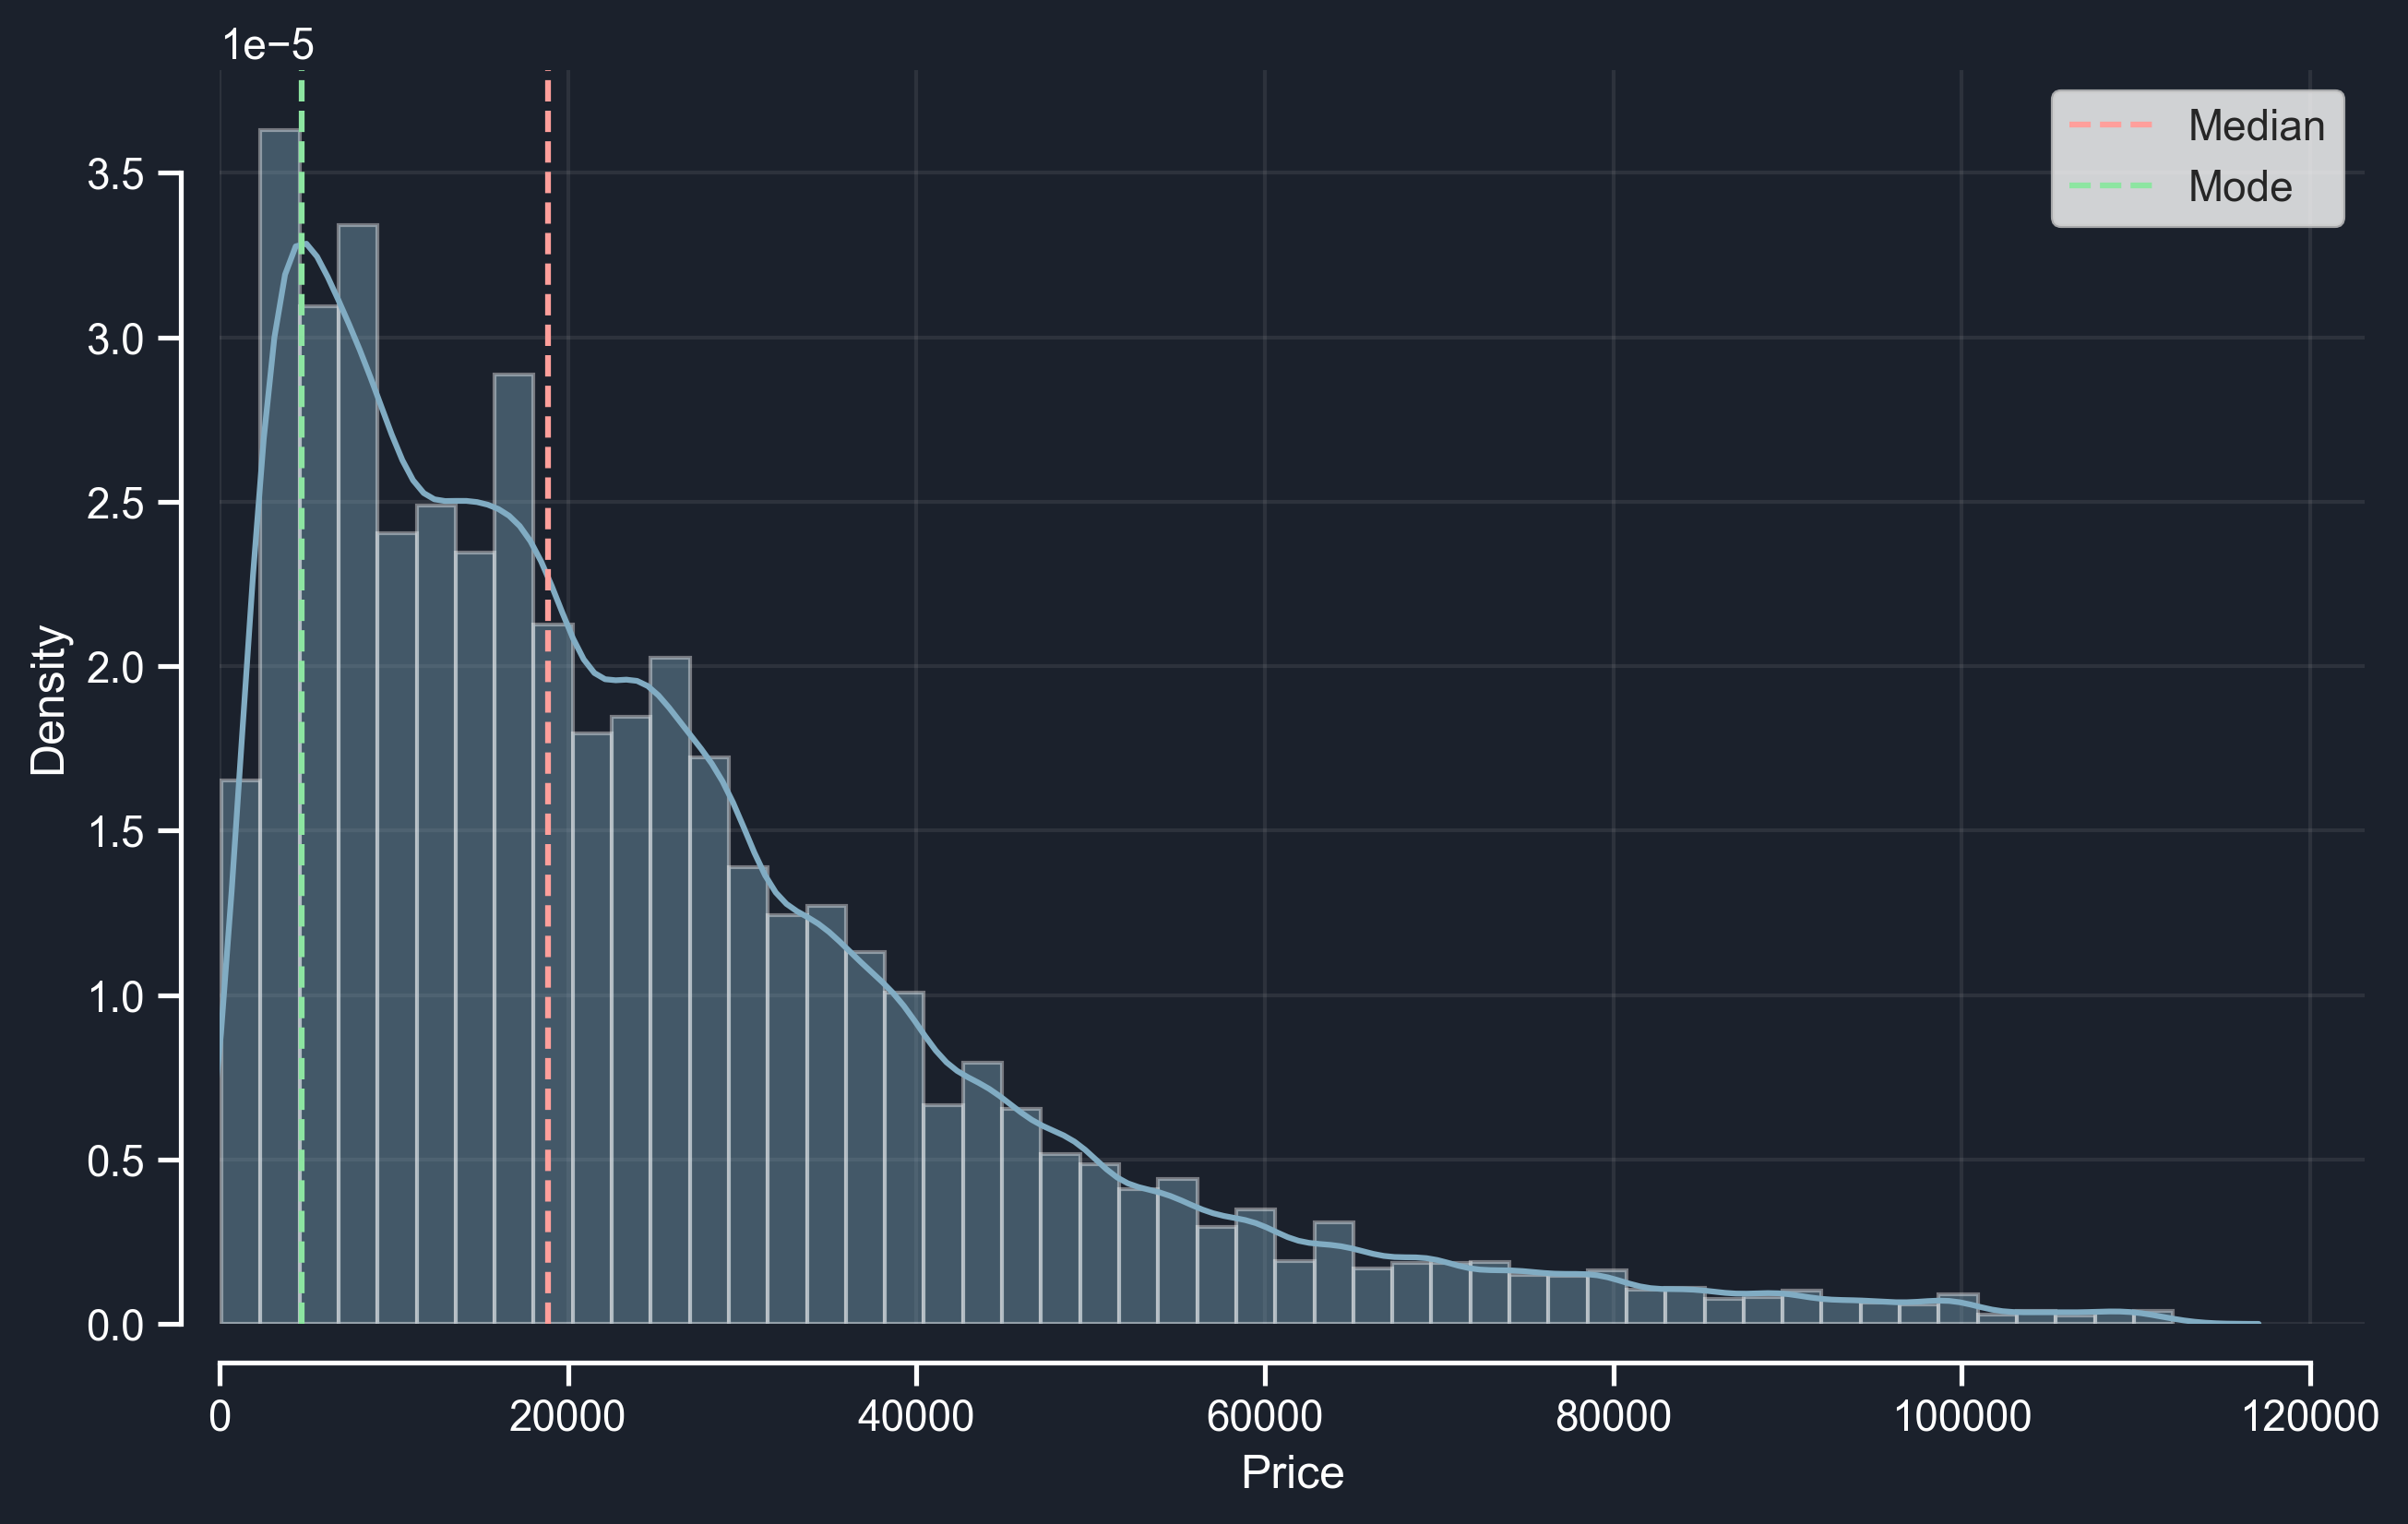

In [60]:
y = load()["price"]

diff_q = np.quantile(y, [0.0, 0.99])
diff_q[0] = diff_q[0] - (diff_q[0] * 0.05)
diff_q[1] = diff_q[1] + (diff_q[1] * 0.05)

y = [x for x in y if diff_q[1] >= x >= diff_q[0]]

sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.distplot(y, color="#81acc3", hist_kws=dict(alpha=0.4), fit_kws=dict(alpha=1), ax=ax)

plt.xlabel('Price')

plt.axvline(np.median(y), color='r', linestyle='--', label='Median')

plt.axvline(4700, color='g', linestyle='--', label='Mode')

plt.legend(loc='upper right')

sns.despine(offset=10, trim=True)

set_color(fig, ax)

plt.xlim(0, None)
plt.savefig('../images/price_dist.png', dpi=300)
plt.show()

#### Emission class over the years

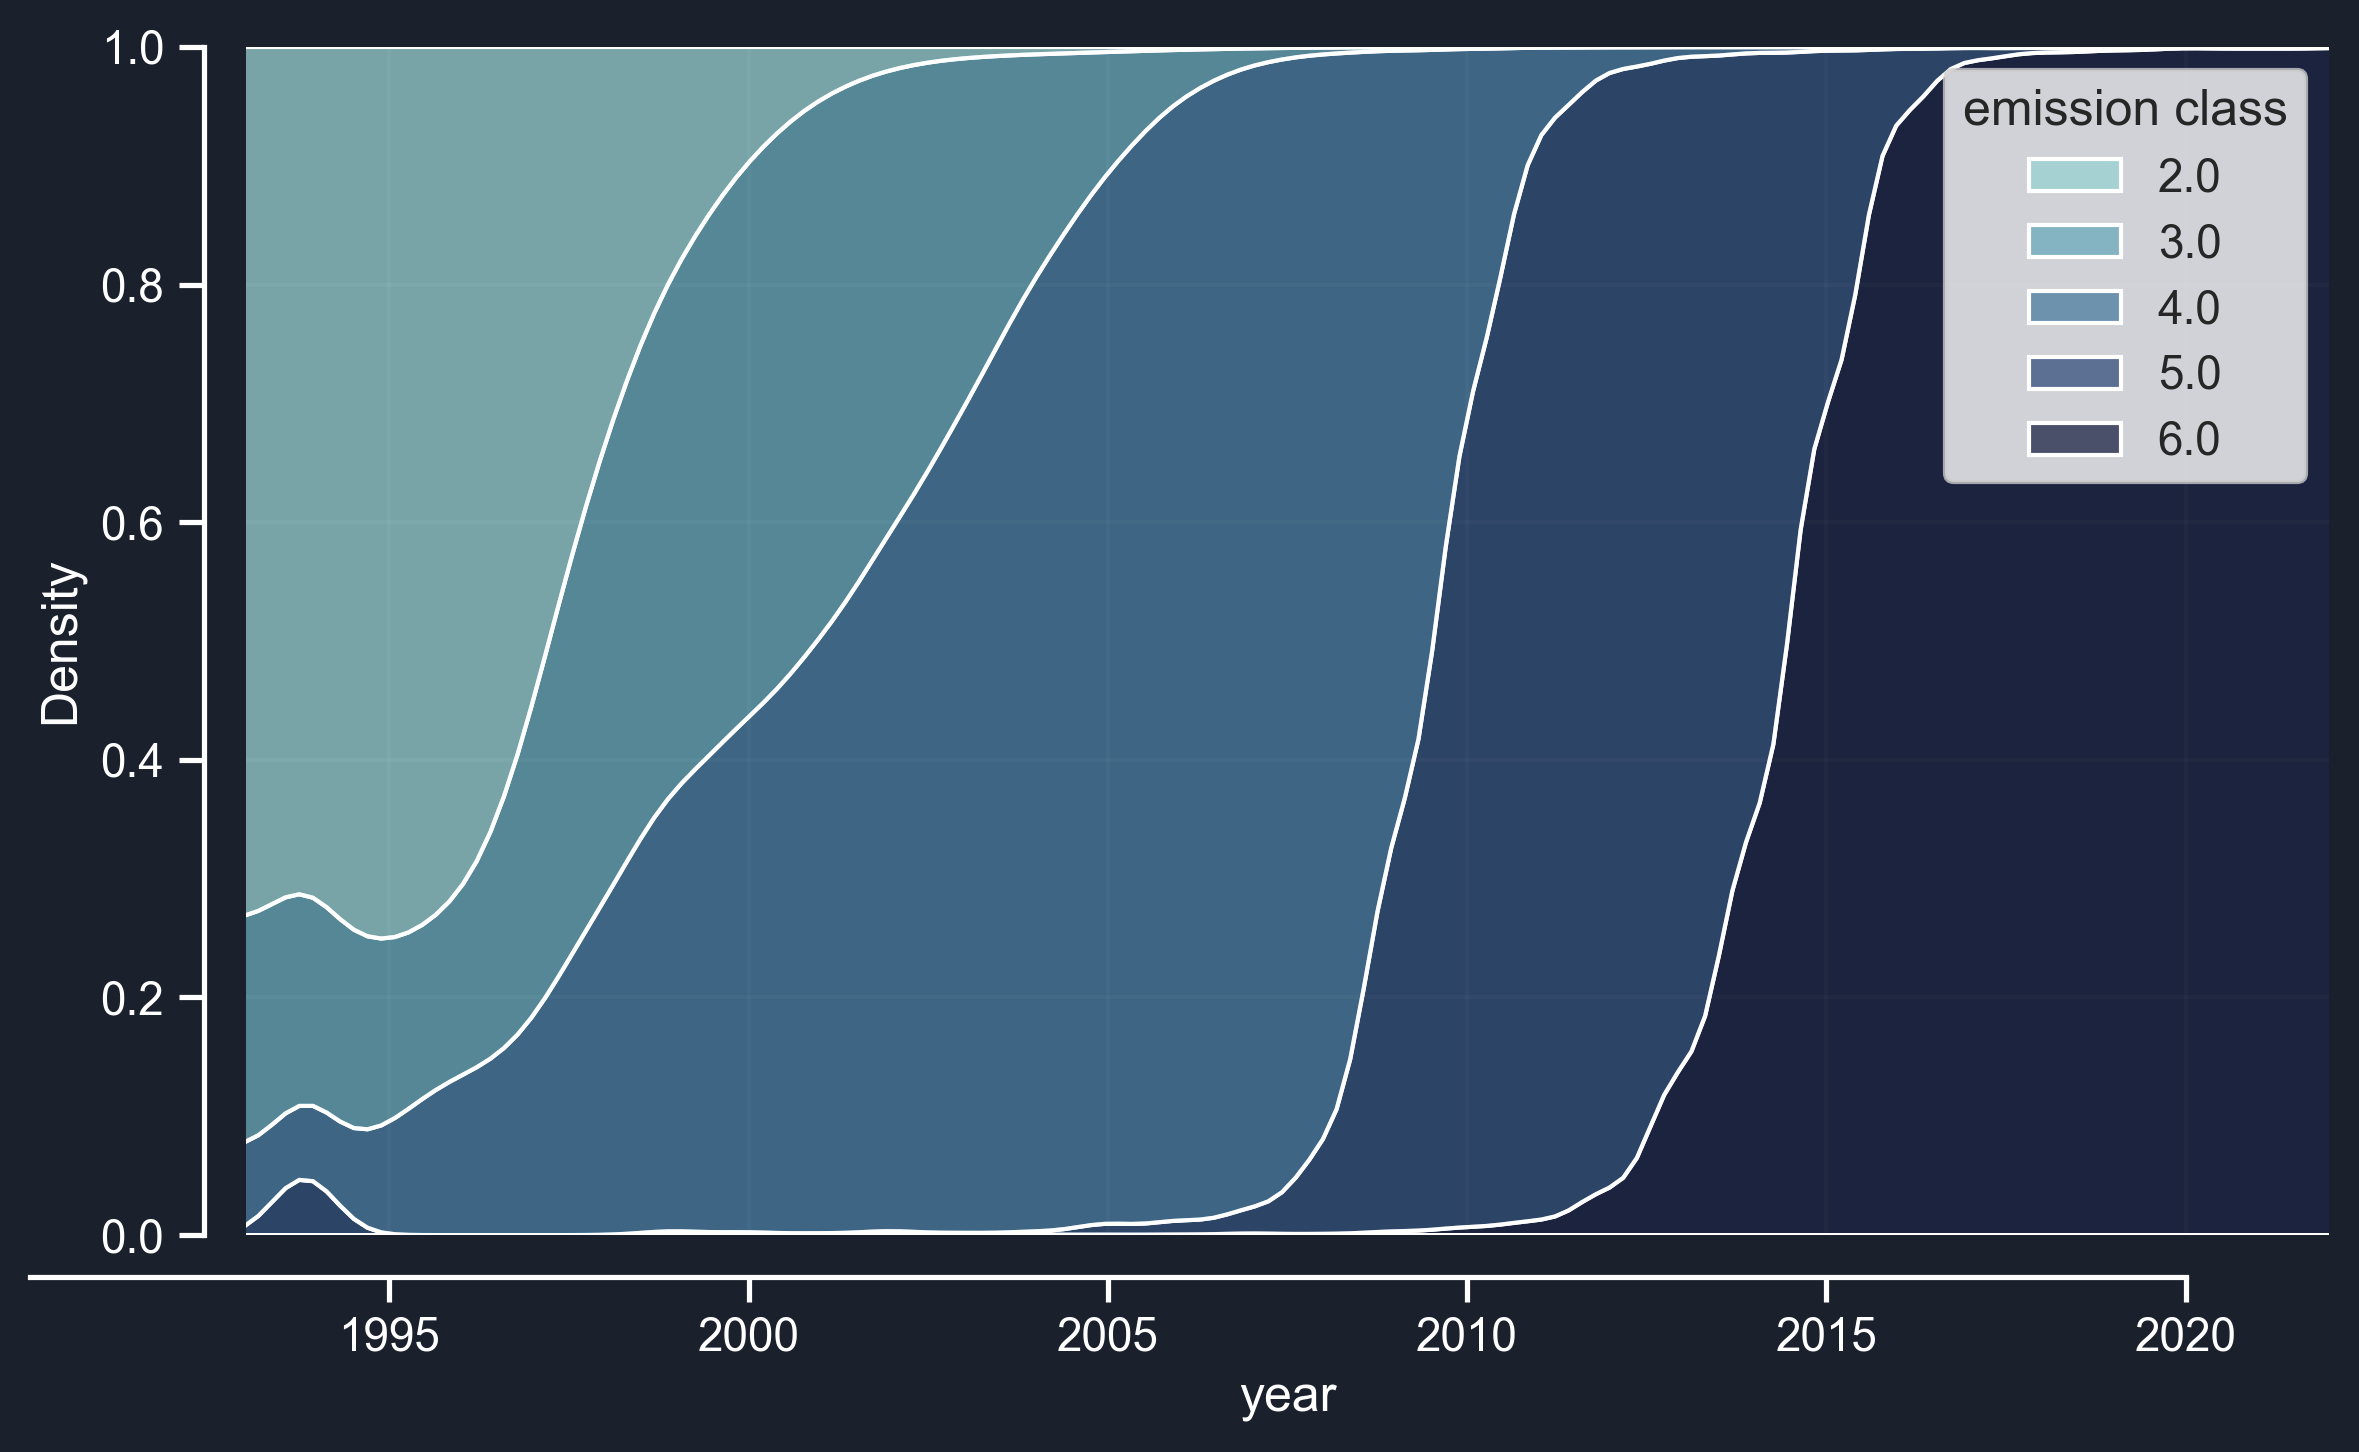

In [14]:
cars = load()
cars = cars[cars['first_registration'] >= 1990]
sns.set_theme(style="ticks", palette="pastel")

cars = cars.rename(columns={"first_registration": "year", "emission_class": "emission class"})

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

sns.kdeplot(
    ax=ax,
    data=cars,
    x="year", hue="emission class",
    multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.75", bw_adjust=2,
)

sns.despine(offset=10, trim=True)

set_color(fig, ax)

plt.xlim(1993, 2022)
plt.tight_layout()
plt.savefig('../images/emission_class_density.png', dpi=300)
plt.show()

#### Price of different colors

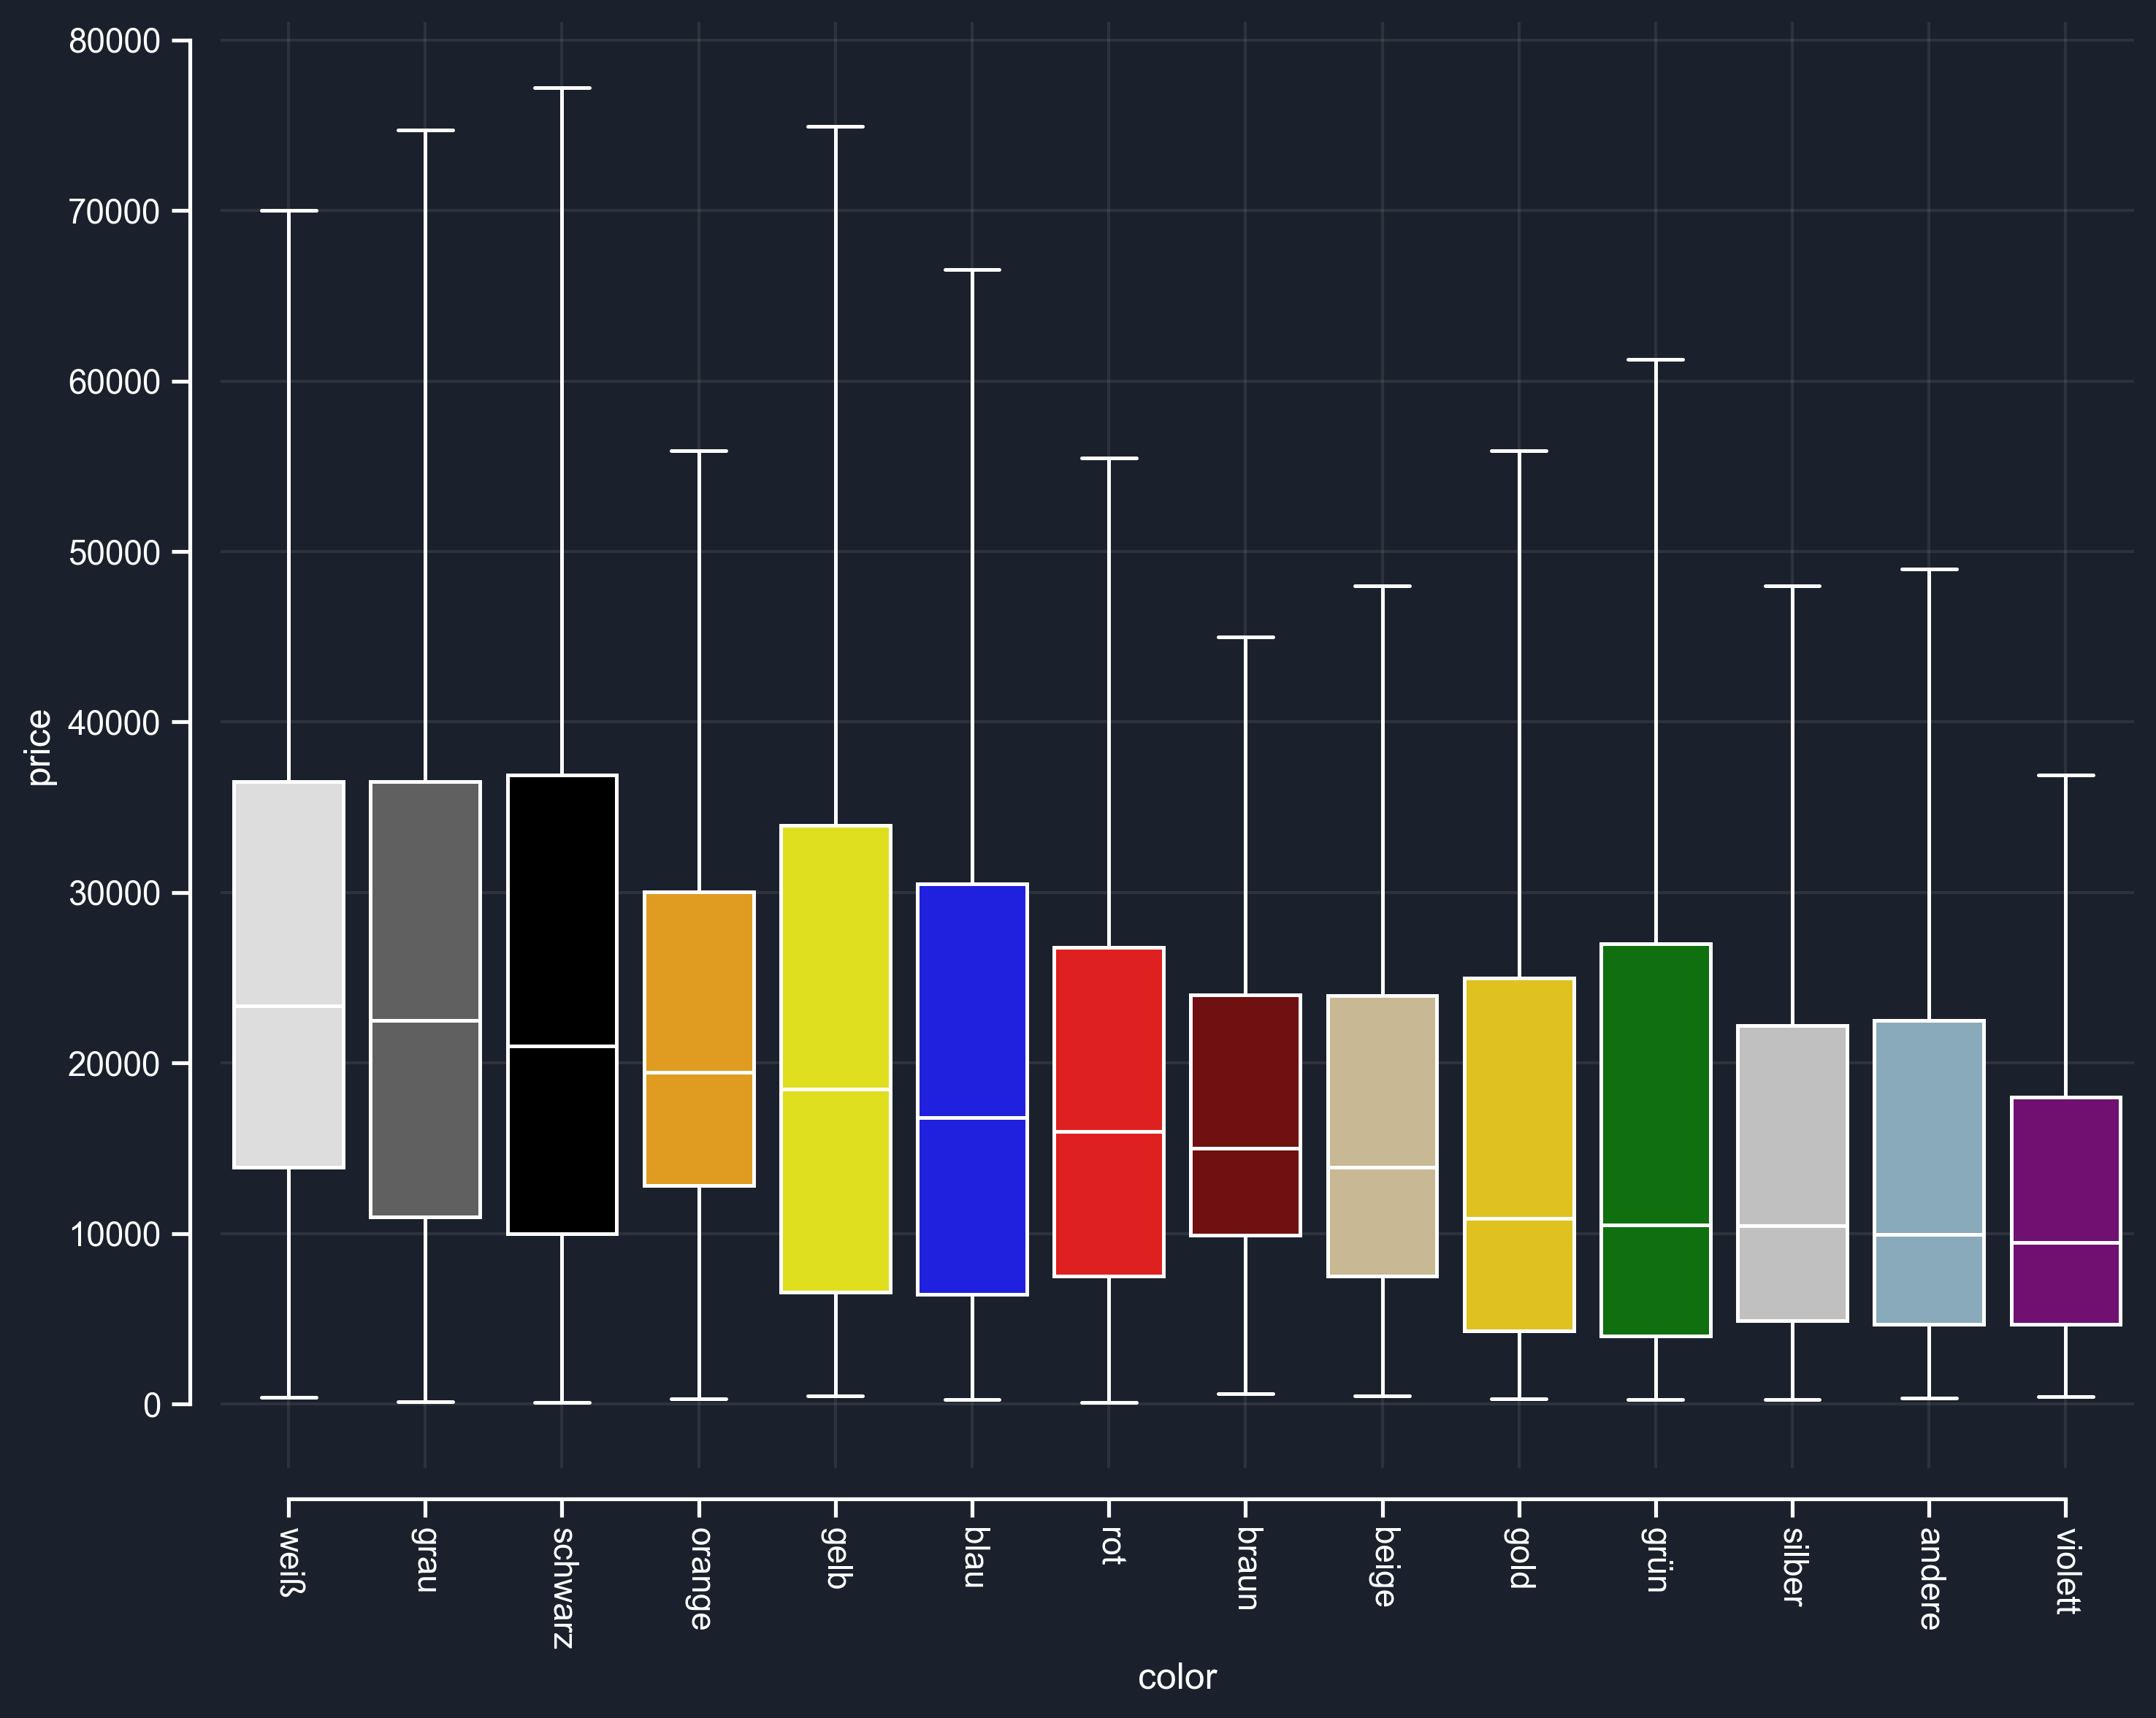

In [62]:
sns.set_theme(style="ticks", palette="pastel")
cars = load()
color = cars['color'].value_counts()
color = color.index.tolist()
colors = cars['color'].unique()

fig, ax = plt.subplots(ncols=1, figsize=(10, 8), dpi=300)

cars_by_color = cars.groupby('color').median()
cars_by_color = cars_by_color.sort_values(by='price', ascending=False)

sns.boxplot(x='color', y='price', data=cars, showfliers=False,
            ax=ax, palette=my_pal, order=cars_by_color.index.tolist(), linewidth=1.2, **PROPS)

sns.despine(offset=10, trim=True)
plt.xticks(rotation=-90)
plt.tight_layout()

set_color(fig, ax)
plt.savefig('../images/color_price.png', dpi=300)
plt.show()

#### Manefacturer and their prices

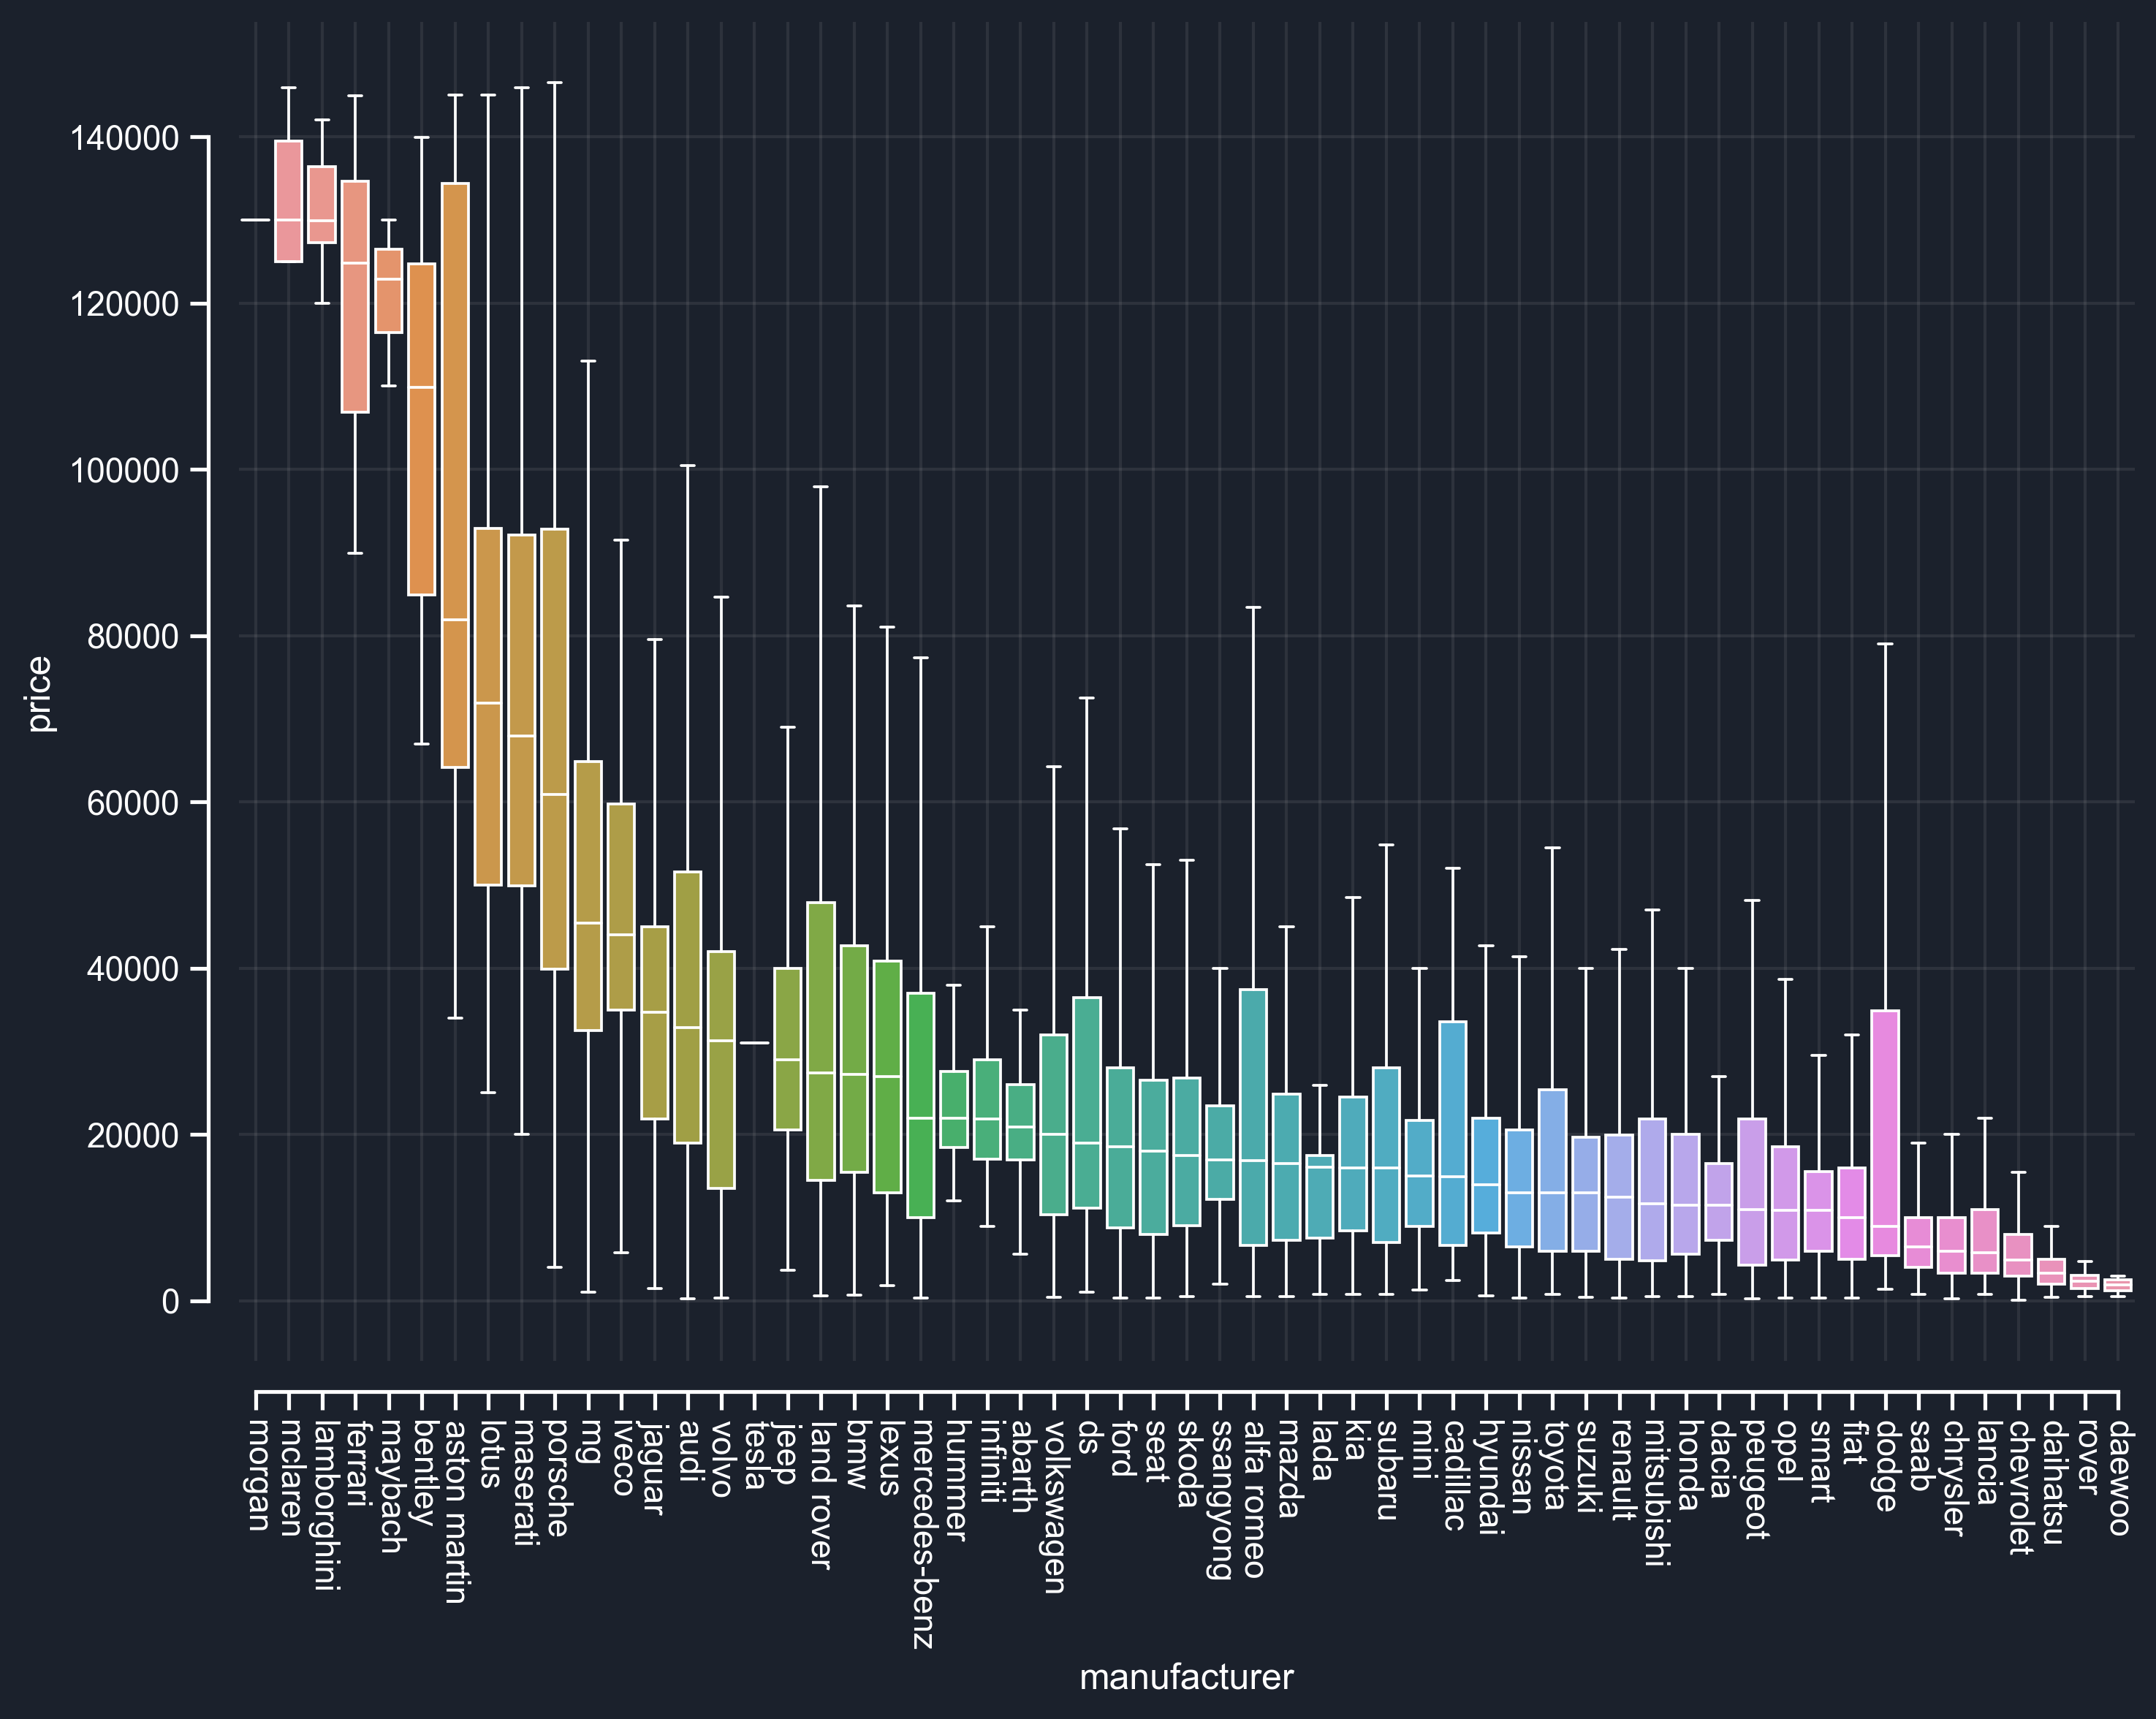

In [63]:
sns.set_theme(style="ticks", palette="pastel")

cars = load()

cars = cars[cars["condition"] == "unfallfrei"]

manufacturers = cars['manufacturer'].value_counts()
manufacturers = manufacturers.index.tolist()

cars_by_manufacturer = cars.groupby('manufacturer').median()
cars_by_manufacturer = cars_by_manufacturer.sort_values(by='price', ascending=False)

fig, ax = plt.subplots(ncols=1, figsize=(10, 8), dpi=300)

sns.boxplot(x='manufacturer', y='price', data=cars, showfliers=False,
            ax=ax, order=cars_by_manufacturer.index.tolist(), linewidth=0.9, **PROPS)

sns.despine(offset=10, trim=True)
plt.xticks(rotation=-90)
plt.tight_layout()

set_color(fig, ax)
plt.savefig('../images/manufacturer_price.png', dpi=300)
plt.show()

#### Price of conditions

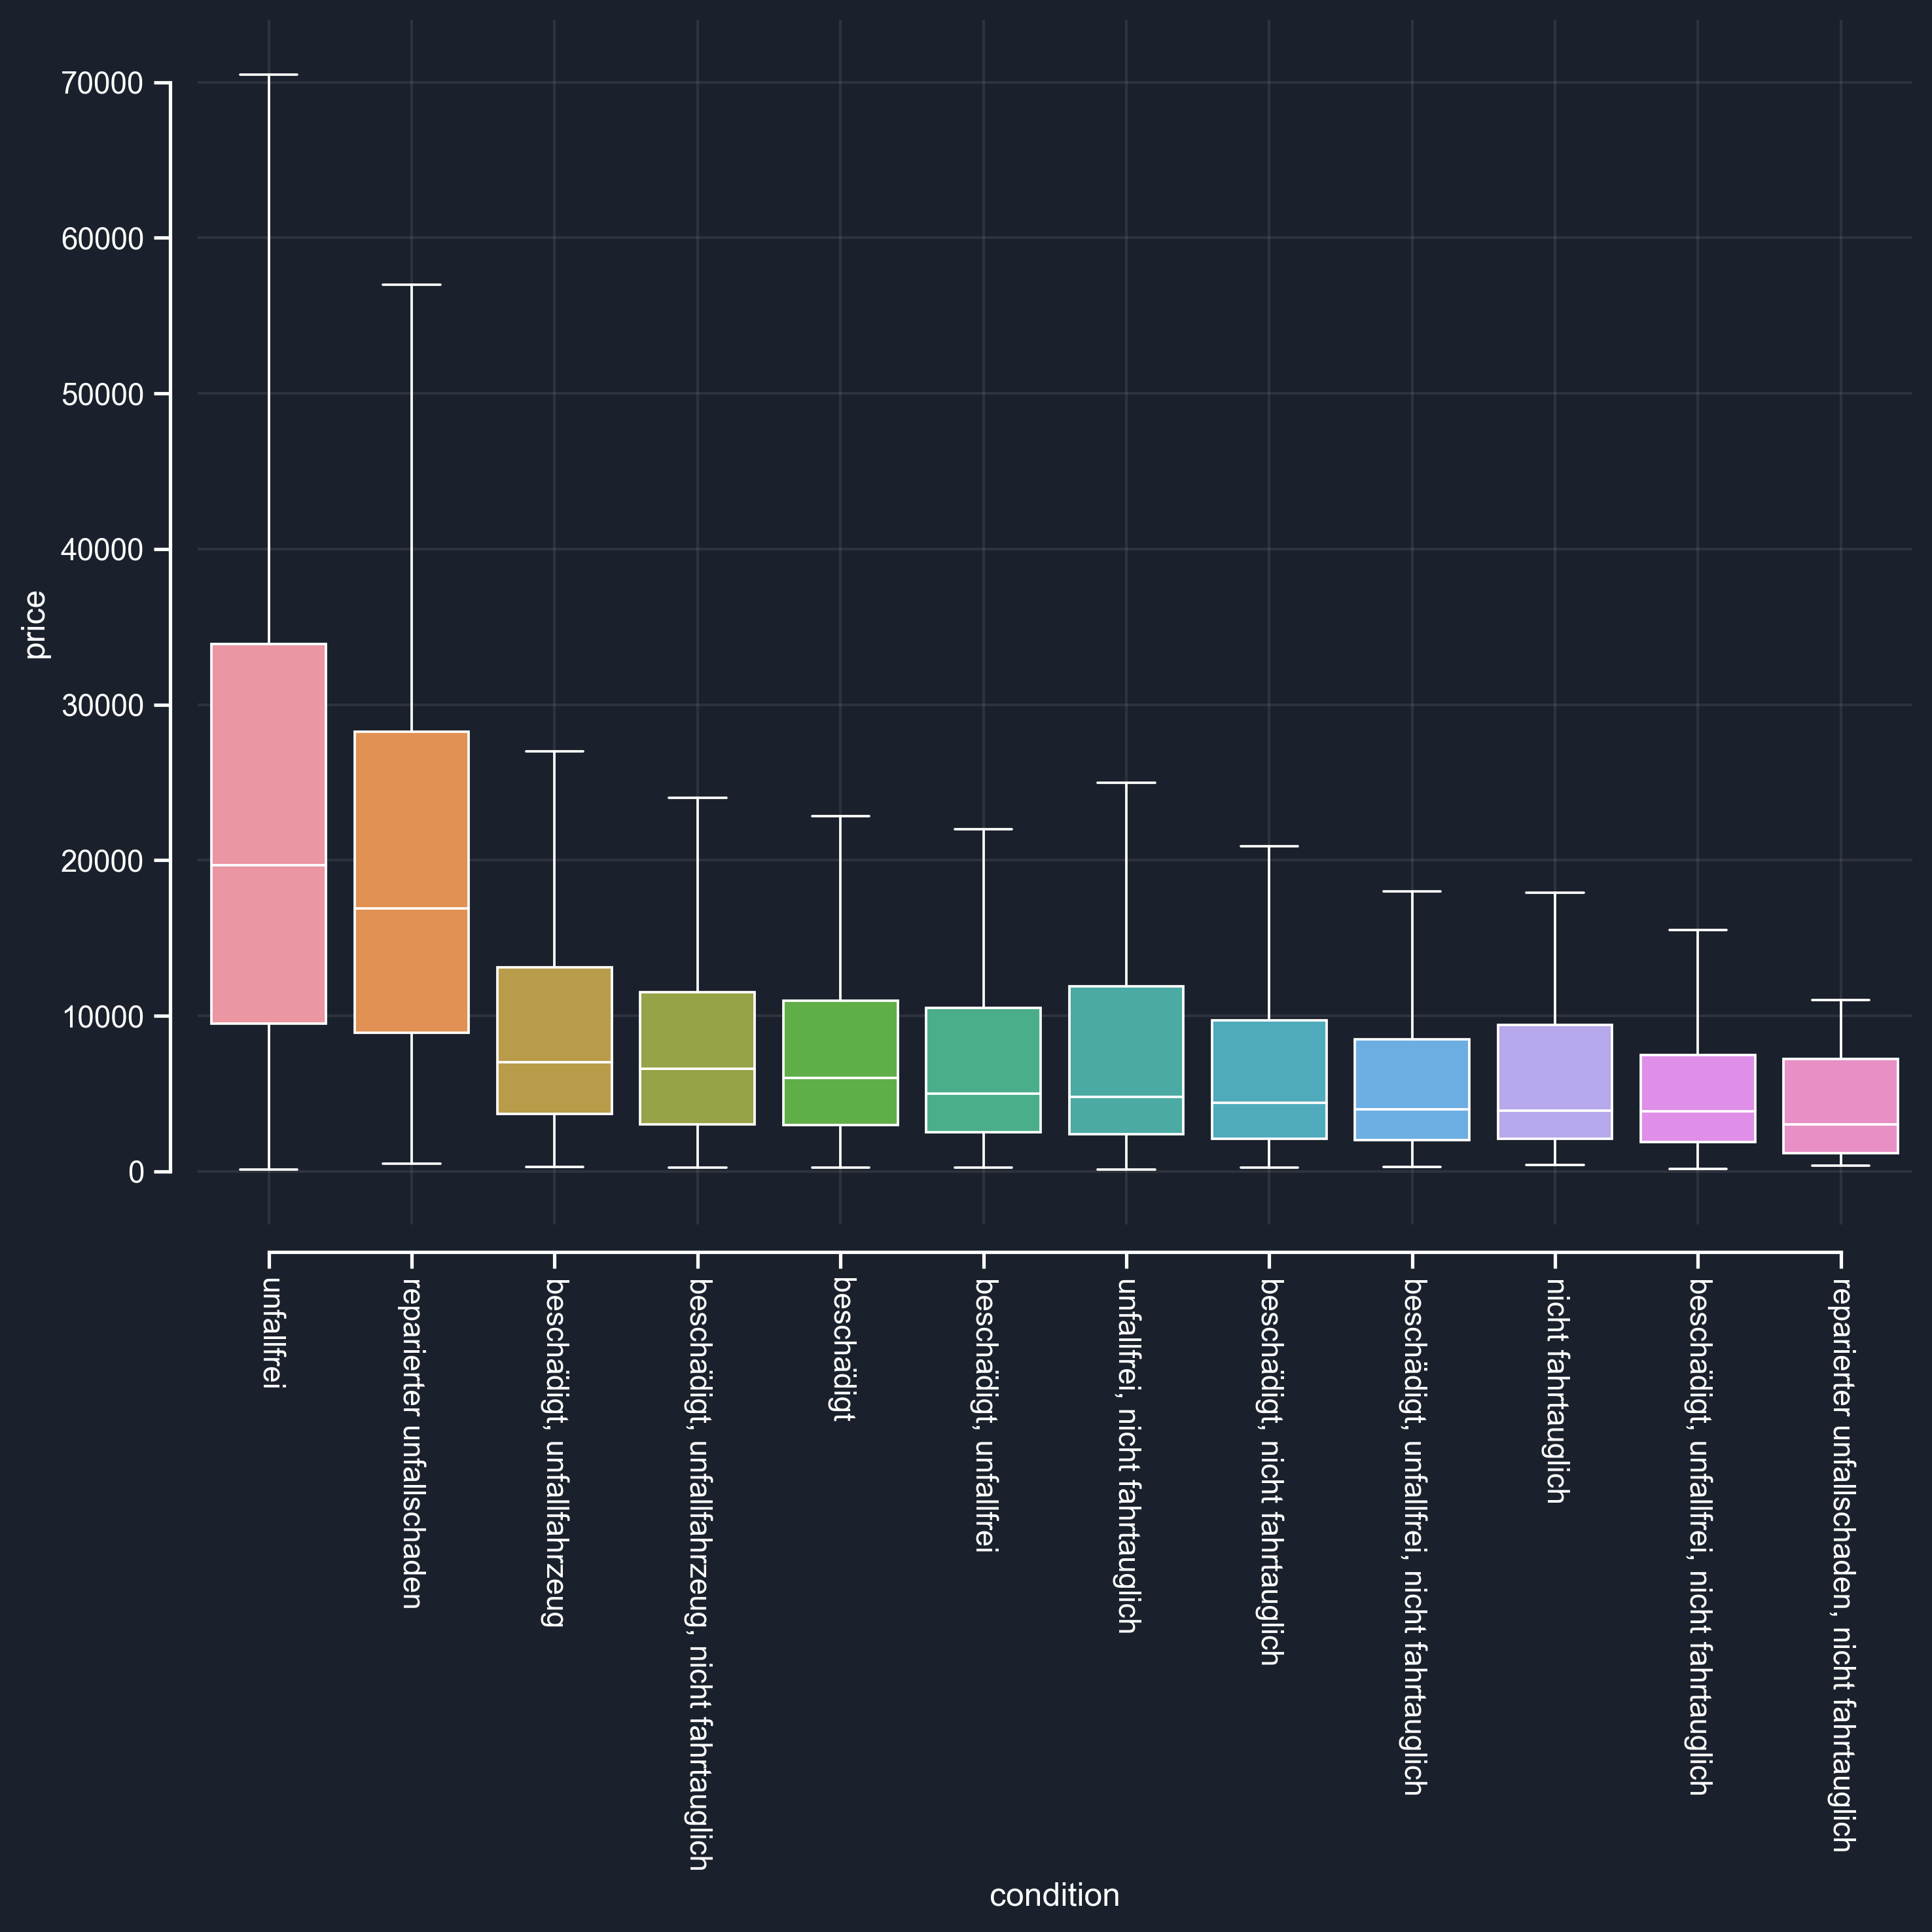

In [64]:
cars = load()

cars_by_condition = cars.groupby('condition').median()
cars_by_condition = cars_by_condition.sort_values(by='price', ascending=False)

fig, ax = plt.subplots(ncols=1, figsize=(10, 10), dpi=300)

sns.boxplot(x='condition', y='price', data=cars, showfliers=False, ax=ax,
            order=cars_by_condition.index.tolist(), linewidth=0.9, **PROPS)

sns.despine(offset=10, trim=True)
plt.xticks(rotation=-90)
plt.tight_layout()

set_color(fig, ax)
plt.savefig('../images/condition_price.png', dpi=300)
plt.show()

#### Heatmap of power and price

In [65]:
cars = load()

cars = cars[cars['price'] <= 100000]
cars = cars[cars['power'] <= 500]

g = sns.JointGrid(x='price', y='power', data=cars, space=0)
g.fig.set_dpi(300)
g.plot_joint(sns.kdeplot,fill=True, thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=50)

set_color(g.fig, g.ax_joint)
set_color(g.fig, g.ax_marg_y)
set_color(g.fig, g.ax_marg_x)
plt.savefig('../images/power_price_comet.png', dpi=300)
plt.show()

'\ncars = load()\n\n# delete all cars where price > 100000\ncars = cars[cars[\'price\'] <= 100000]\n# delete all cars where power > 500\ncars = cars[cars[\'power\'] <= 500]\n\ng = sns.JointGrid(x=\'price\', y=\'power\', data=cars, space=0)\ng.fig.set_dpi(300)\ng.plot_joint(sns.kdeplot,fill=True, thresh=0, levels=100, cmap="rocket")\ng.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=50)\n\nset_color(g.fig, g.ax_joint)\nset_color(g.fig, g.ax_marg_y)\nset_color(g.fig, g.ax_marg_x)\nplt.savefig(\'./plots/power_price_comet.png\', dpi=300)\nplt.show()\n'

#### extreme Outlier fucks up regression example

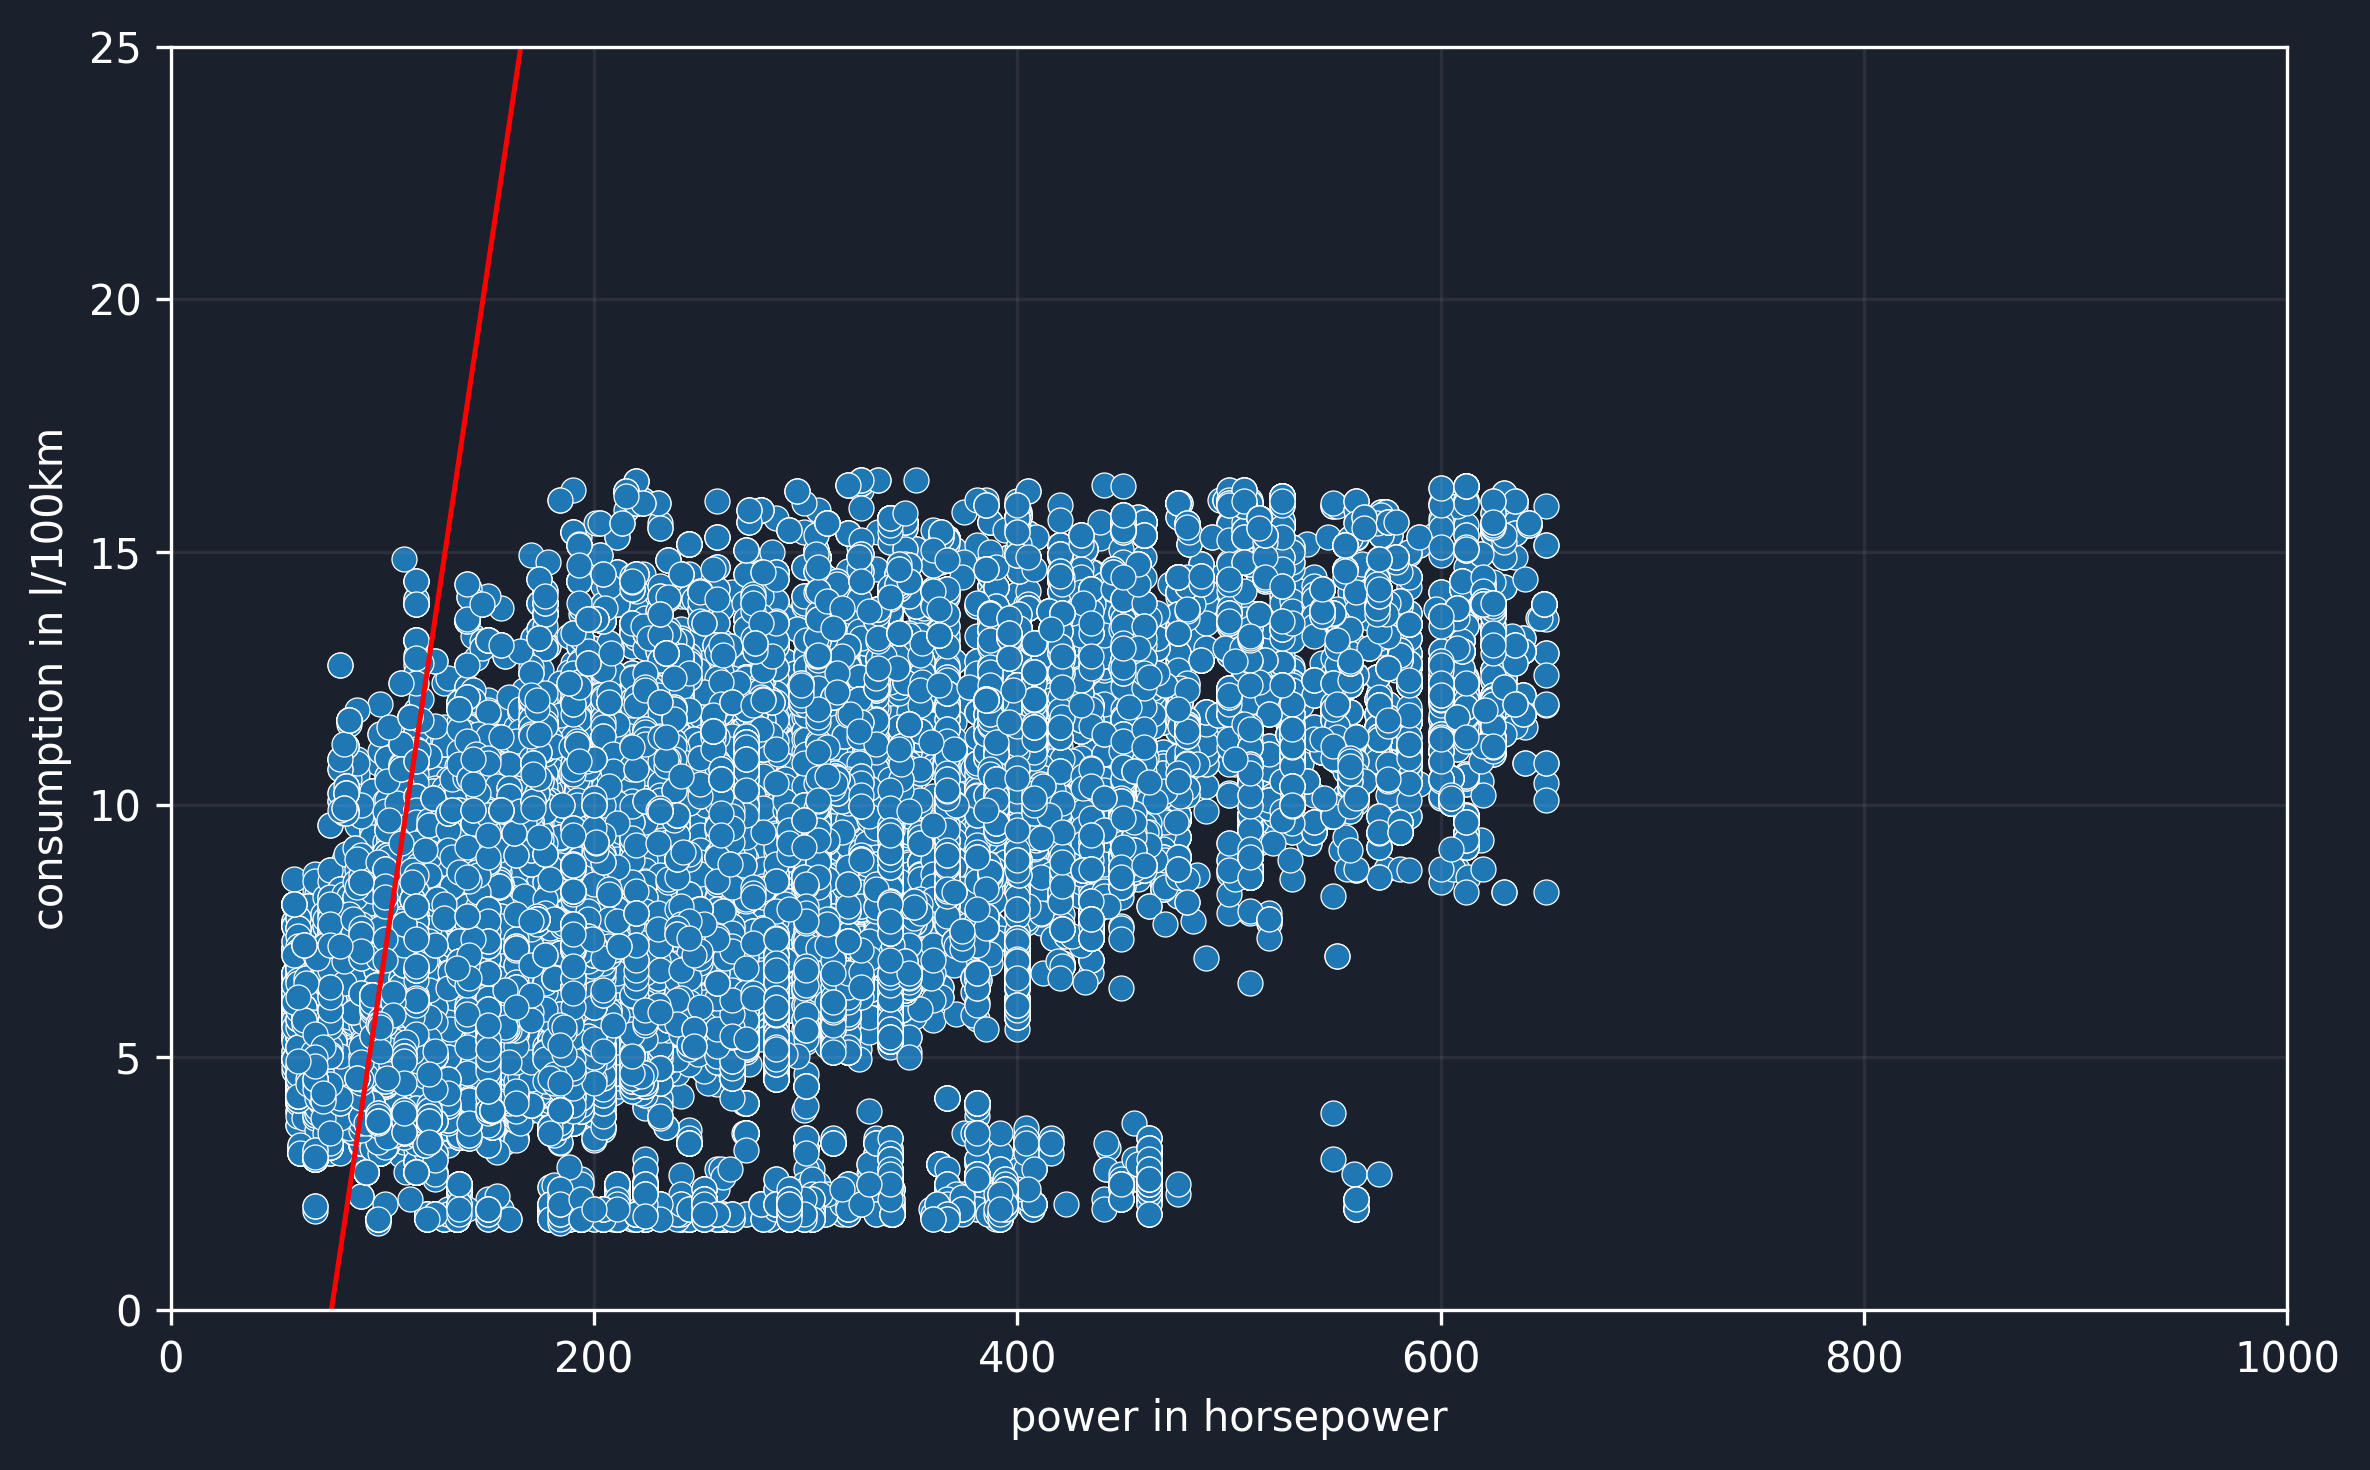

In [12]:
cars = load()

# create an outlier to recreate the graph
cars.loc[4, 'consumption'] = 6000000
cars.loc[4, 'power'] = 300

X = cars[['power']]
y = cars['consumption']

model = LinearRegression().fit(X, y)

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
sns.scatterplot(x='power', y='consumption', data=cars, ax=ax, linewidth=0.3)
set_color(fig, ax)

x = np.linspace(0, 1000, 100)
y = model.predict(x.reshape(-1, 1))
plt.plot(x, y, color='red', linewidth=1.2)

plt.xlabel('power in horsepower')
plt.ylabel('consumption in l/100km')
plt.ylim(0, 25)
plt.xlim(0, 1000)

plt.tight_layout()
plt.savefig('../images/wrong_regression.png', dpi=300)
plt.show()

#### Correlation matrix

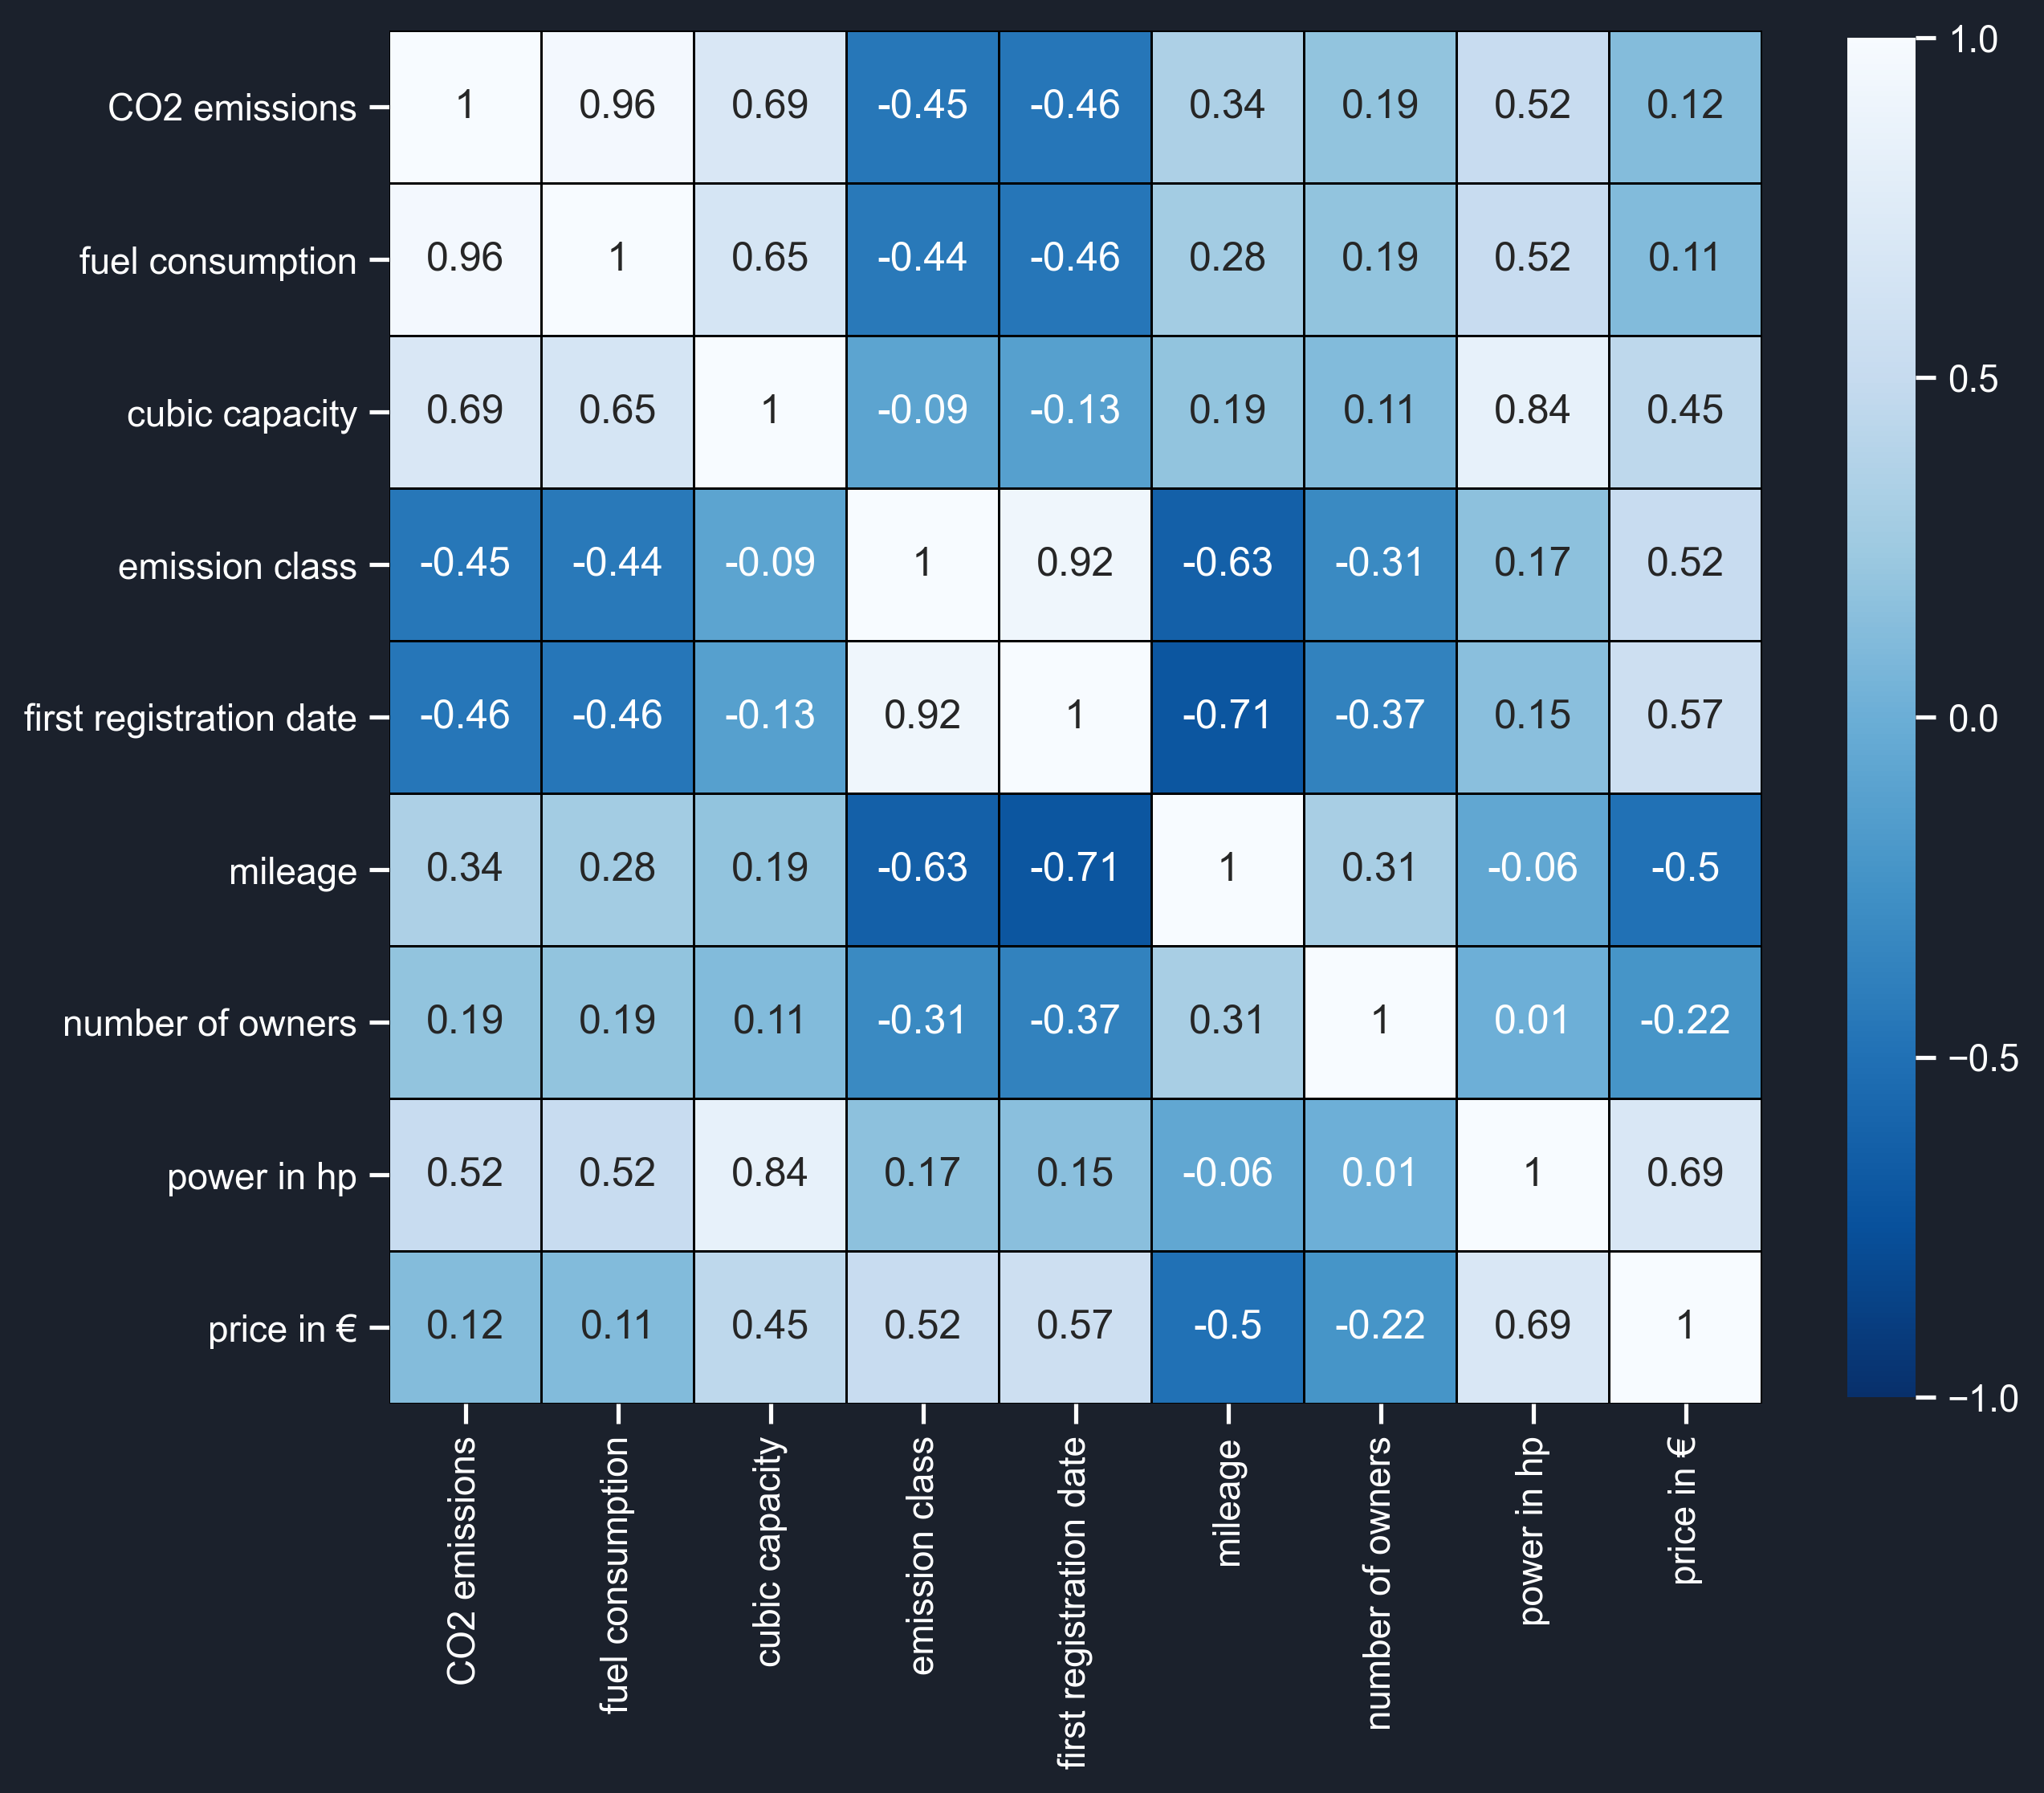

In [68]:
data = load()
data = data.drop(["van", "gelaendewagen", "kleinwagen", "cabrio", "kombi", "limousine", "sportwagen", "num_seats", "doors"], axis=1)
corr = data.corr()

fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

corr = corr.round(2)

labels = ["CO2 emissions", "fuel consumption", "cubic capacity", "emission class",
          "first registration date", "mileage", "number of owners",
          "power in hp", "price in €"]

cax = sns.heatmap(corr, xticklabels=labels, yticklabels=labels,
            cmap="Blues_r", annot=True, ax=ax, square=True, linewidths=.5, cbar=True,
                  vmin=-1, vmax=1, cbar_kws={"shrink": .73}, linecolor="black")

set_color(fig, ax)

cbar = cax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.ax.yaxis.set_tick_params(color="white")
cbar.outline.set_edgecolor("white")
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="white")

plt.tight_layout()
plt.savefig("../images/correlation_without.png", dpi=300)
plt.show()

#### Car type price

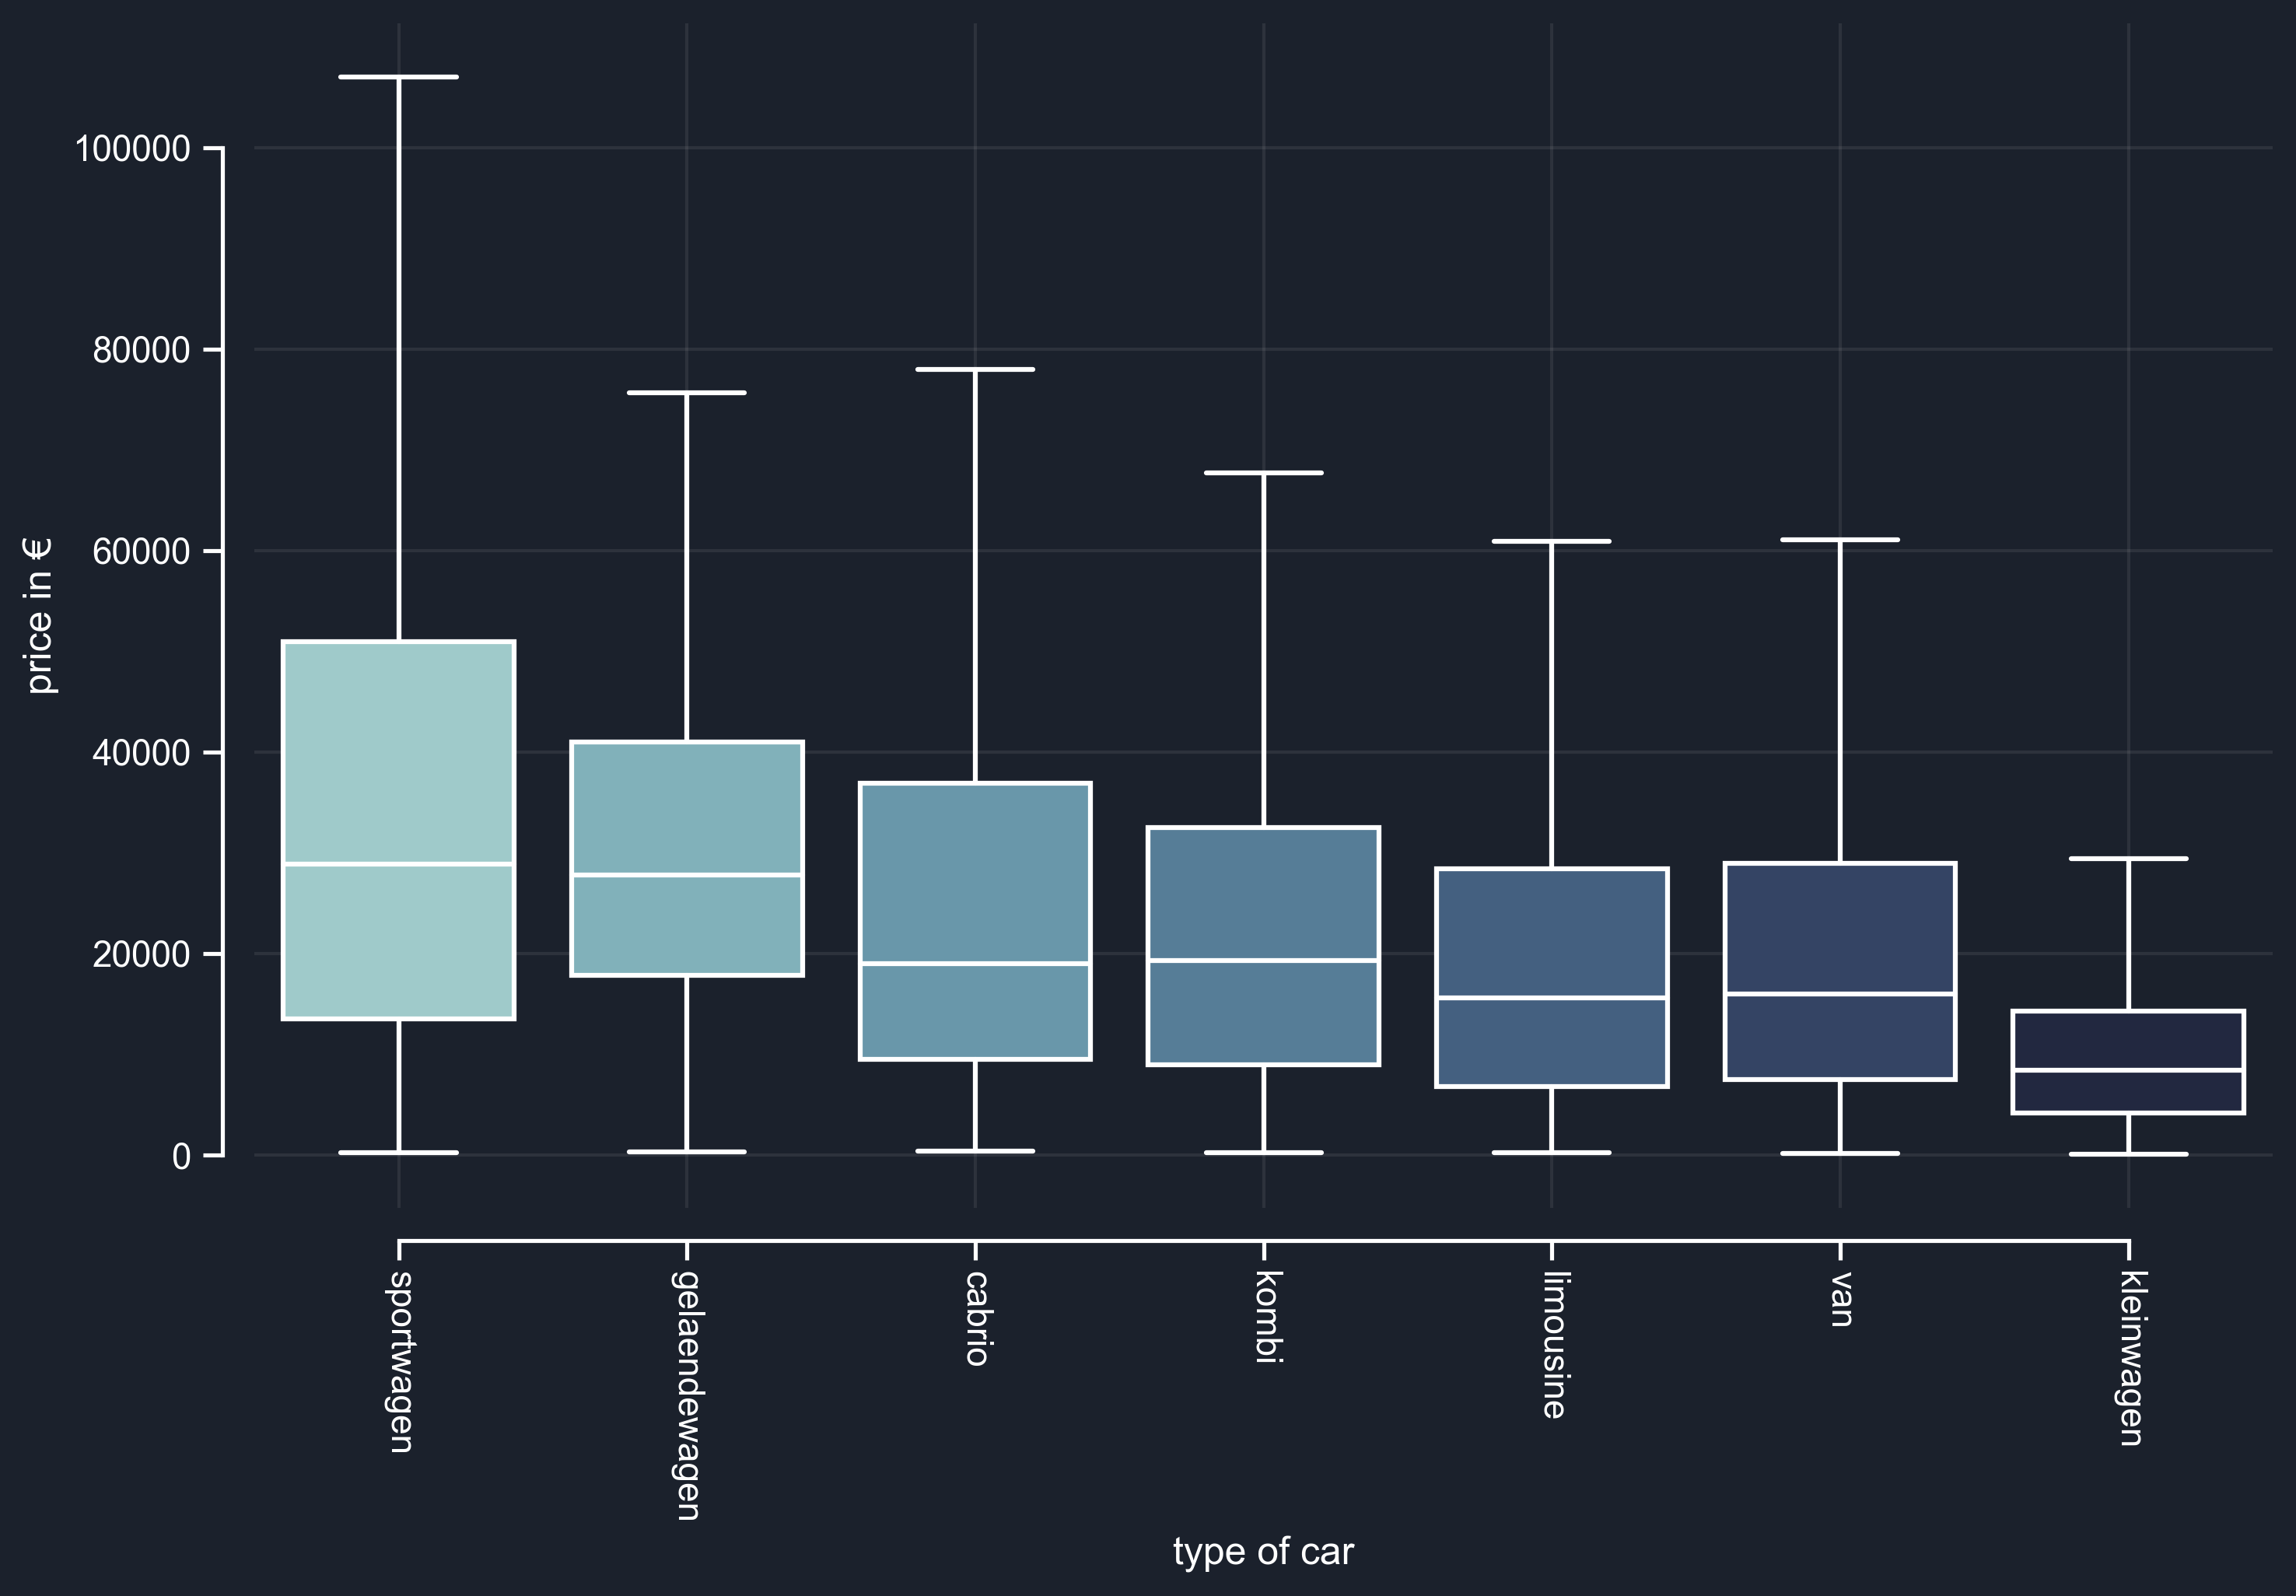

In [69]:
cars = load()

sns.set_theme(style="ticks", palette="pastel")

types = ["sportwagen", "gelaendewagen","cabrio","kombi","limousine","van","kleinwagen"]
df = pd.DataFrame(columns=["type", "price"])

for _type in types:
    cars_type = cars[cars[_type] == 1]
    cars_type = cars_type.assign(type=_type)
    df = df.append(cars_type[["type", "price"]])

fig, ax = plt.subplots(ncols=1, figsize=(10, 7), dpi=300)

sns.boxplot(
    x="type",
    y="price",
    data=df,
    ax=ax,
    palette="ch:rot=-.25,hue=1,light=.75",
    showfliers=False,
    **PROPS)

ax.set_xlabel("type of car")
ax.set_ylabel("price in €")

sns.despine(offset=10, trim=True)
plt.xticks(rotation=-90)
set_color(fig, ax)

plt.tight_layout()
plt.savefig("../images/cartype_vs_price.png", dpi=300)
plt.show()

#### Number of owners over time

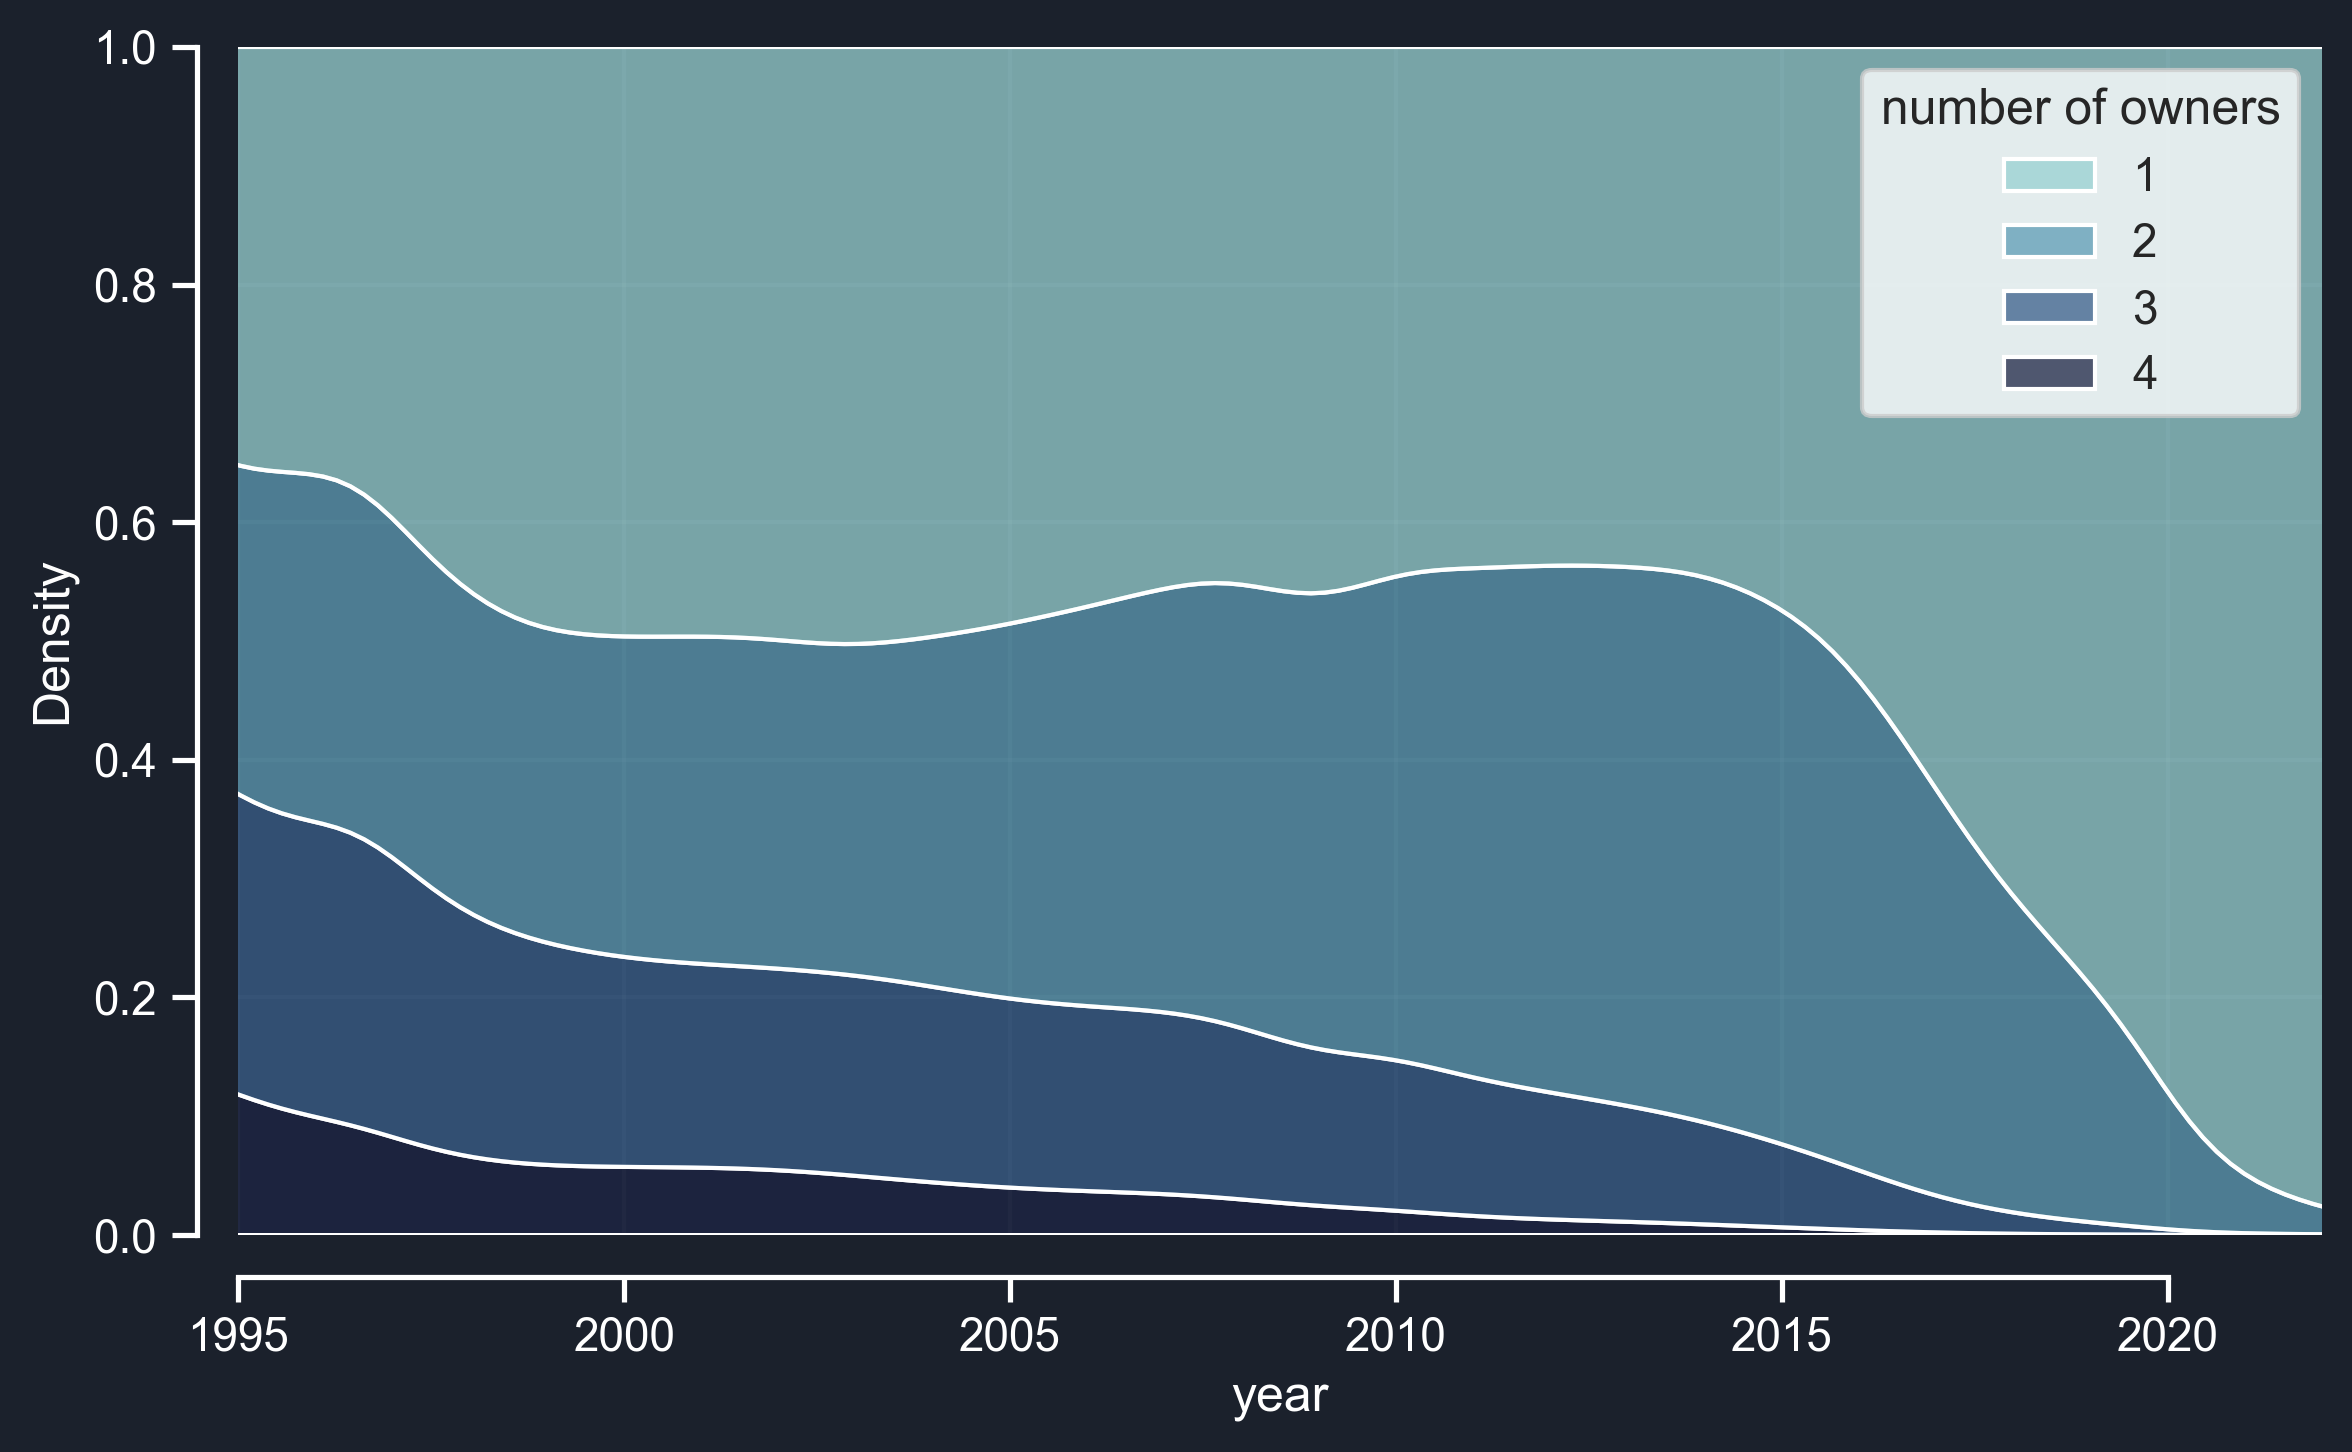

In [70]:
# create a kde plot of the owners distribution per year

cars = load()
cars = cars[cars['first_registration'] >= 1990]
cars = cars.rename(columns={"first_registration": "year", "num_of_owners": "number of owners"})

sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

sns.kdeplot(
    ax=ax,
    data=cars,
    x="year", hue="number of owners",
    multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.75", bw_adjust=1.5,
)

plt.xlim(1995, 2022)

sns.despine(offset=10, trim=True)
set_color(fig, ax)

plt.tight_layout()
plt.savefig("../images/years_vs_numOwners.png", dpi=300)
plt.show()

#### CO2 emissions in emission classes

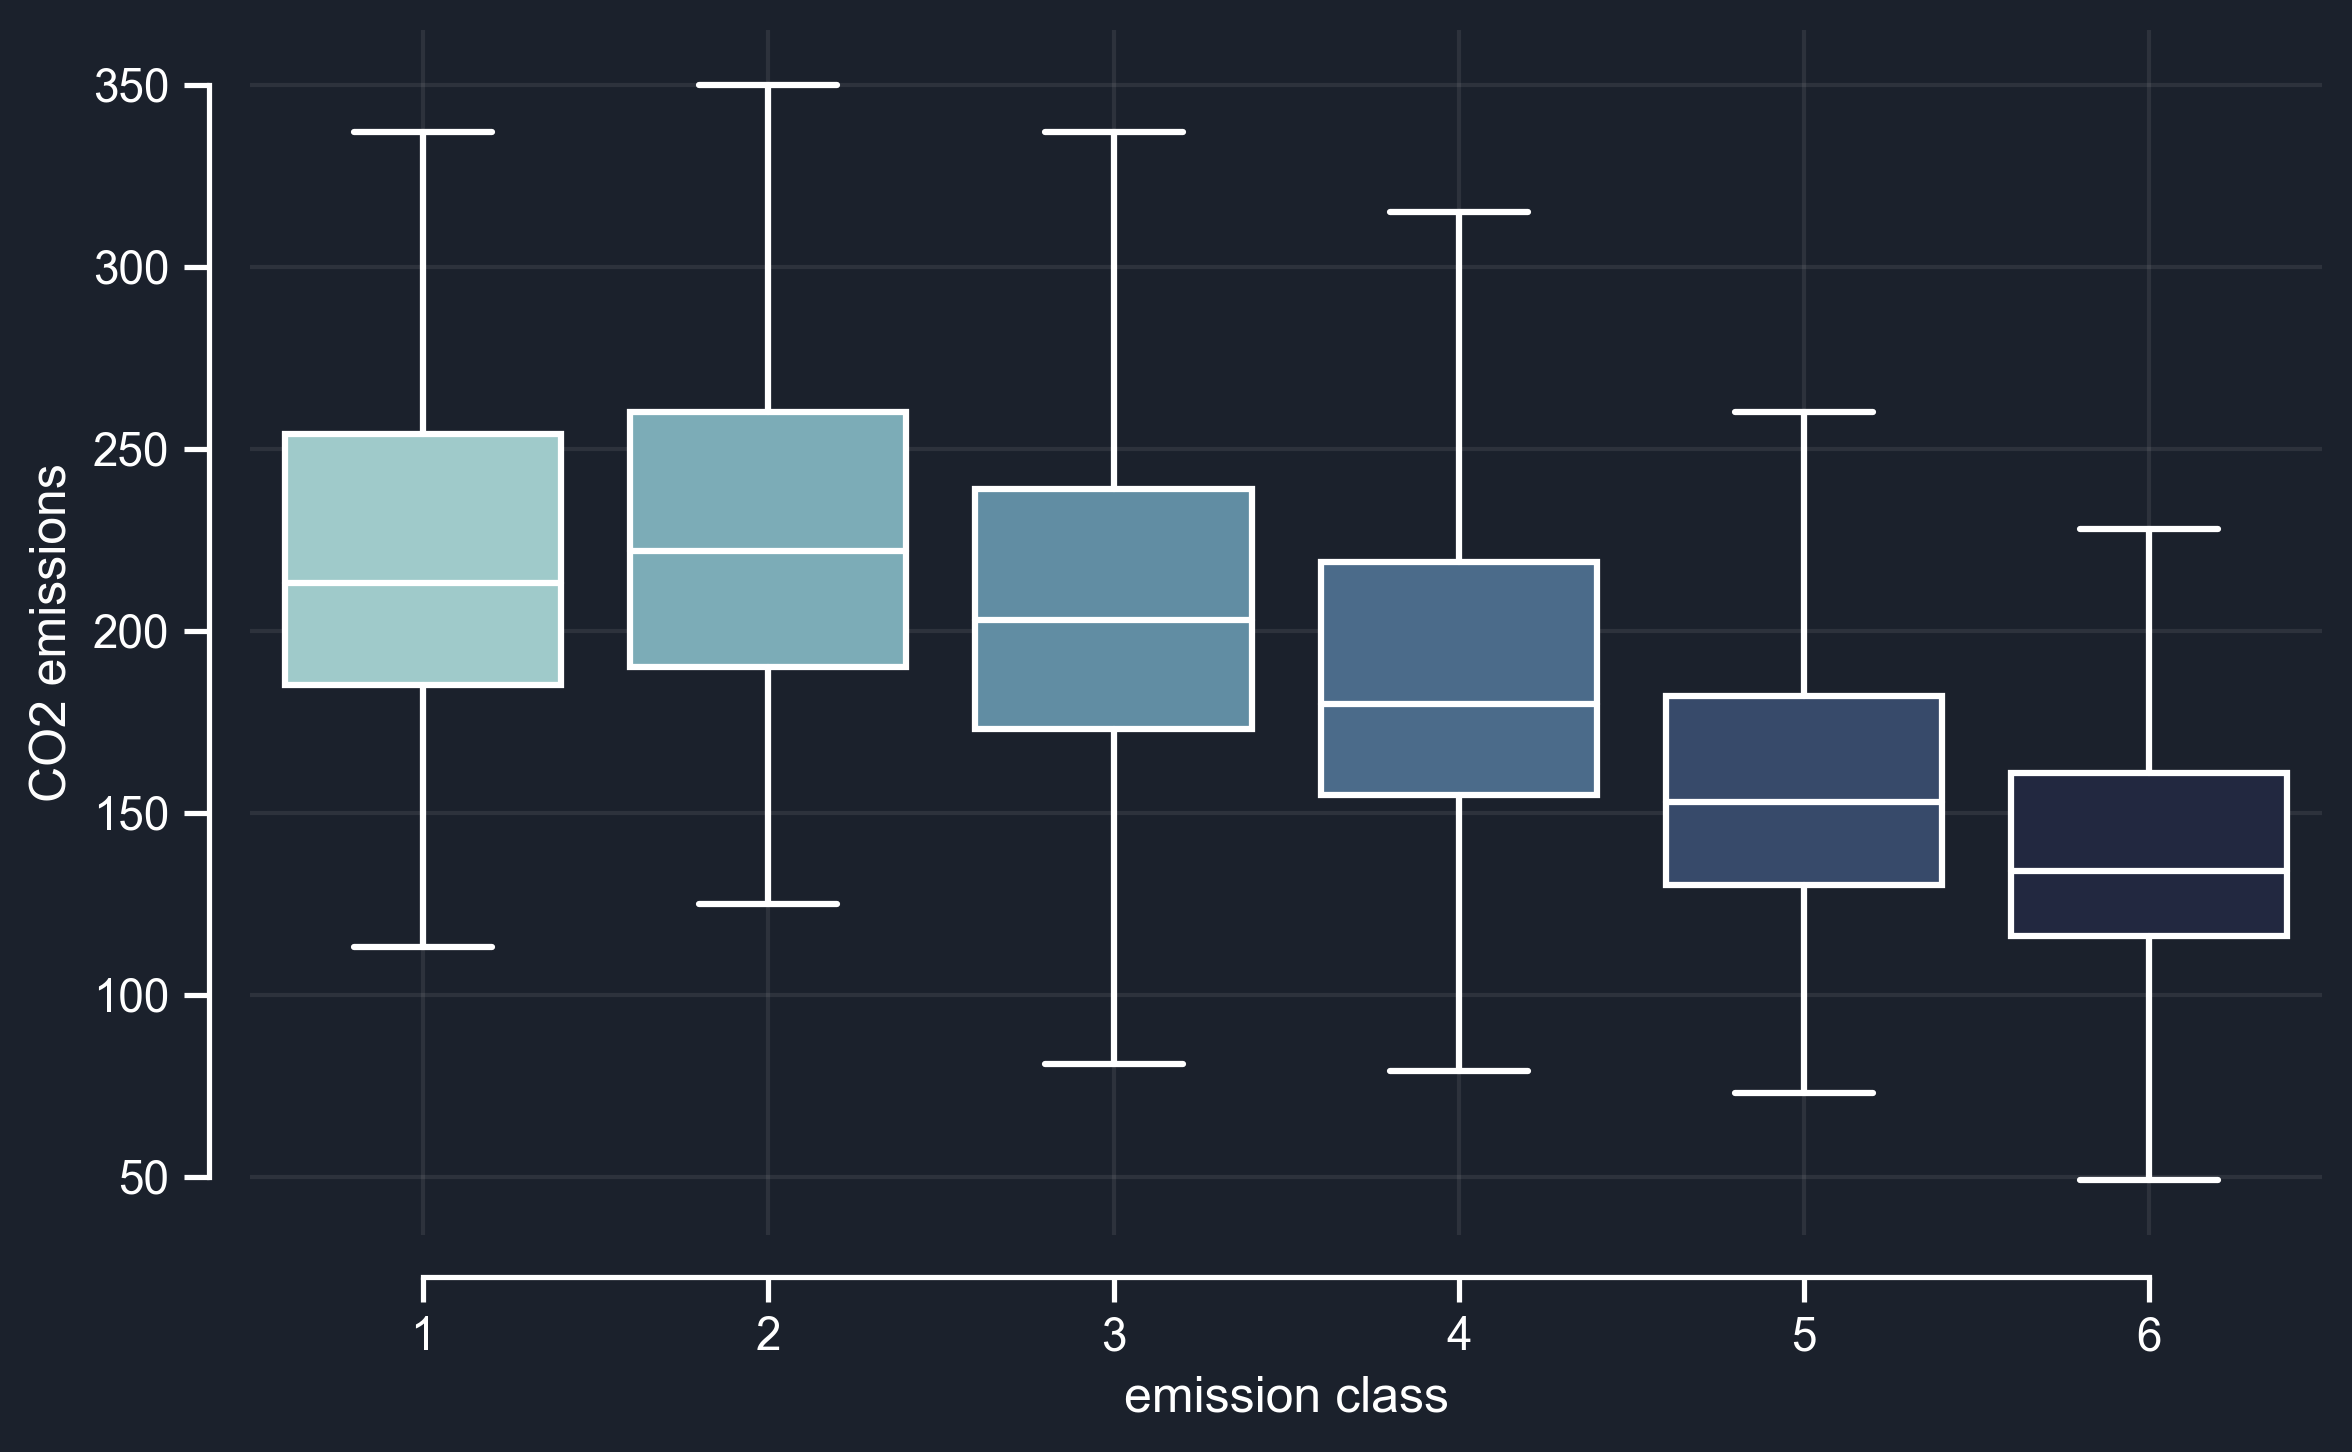

In [71]:
cars = load()
cars = cars.rename(columns={"emission_class": "emission class", "co2": "CO2 emissions"})

sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

sns.boxplot(
    ax=ax,
    data=cars,
    x="emission class", y="CO2 emissions",
    palette="ch:rot=-.25,hue=1,light=.75",
    showfliers=False, **PROPS
)

sns.despine(offset=10, trim=True)
set_color(fig, ax)

plt.tight_layout()
plt.savefig("../images/emission_vs_co2.png", dpi=300)
plt.show()

#### CO2 emissions in fuel types

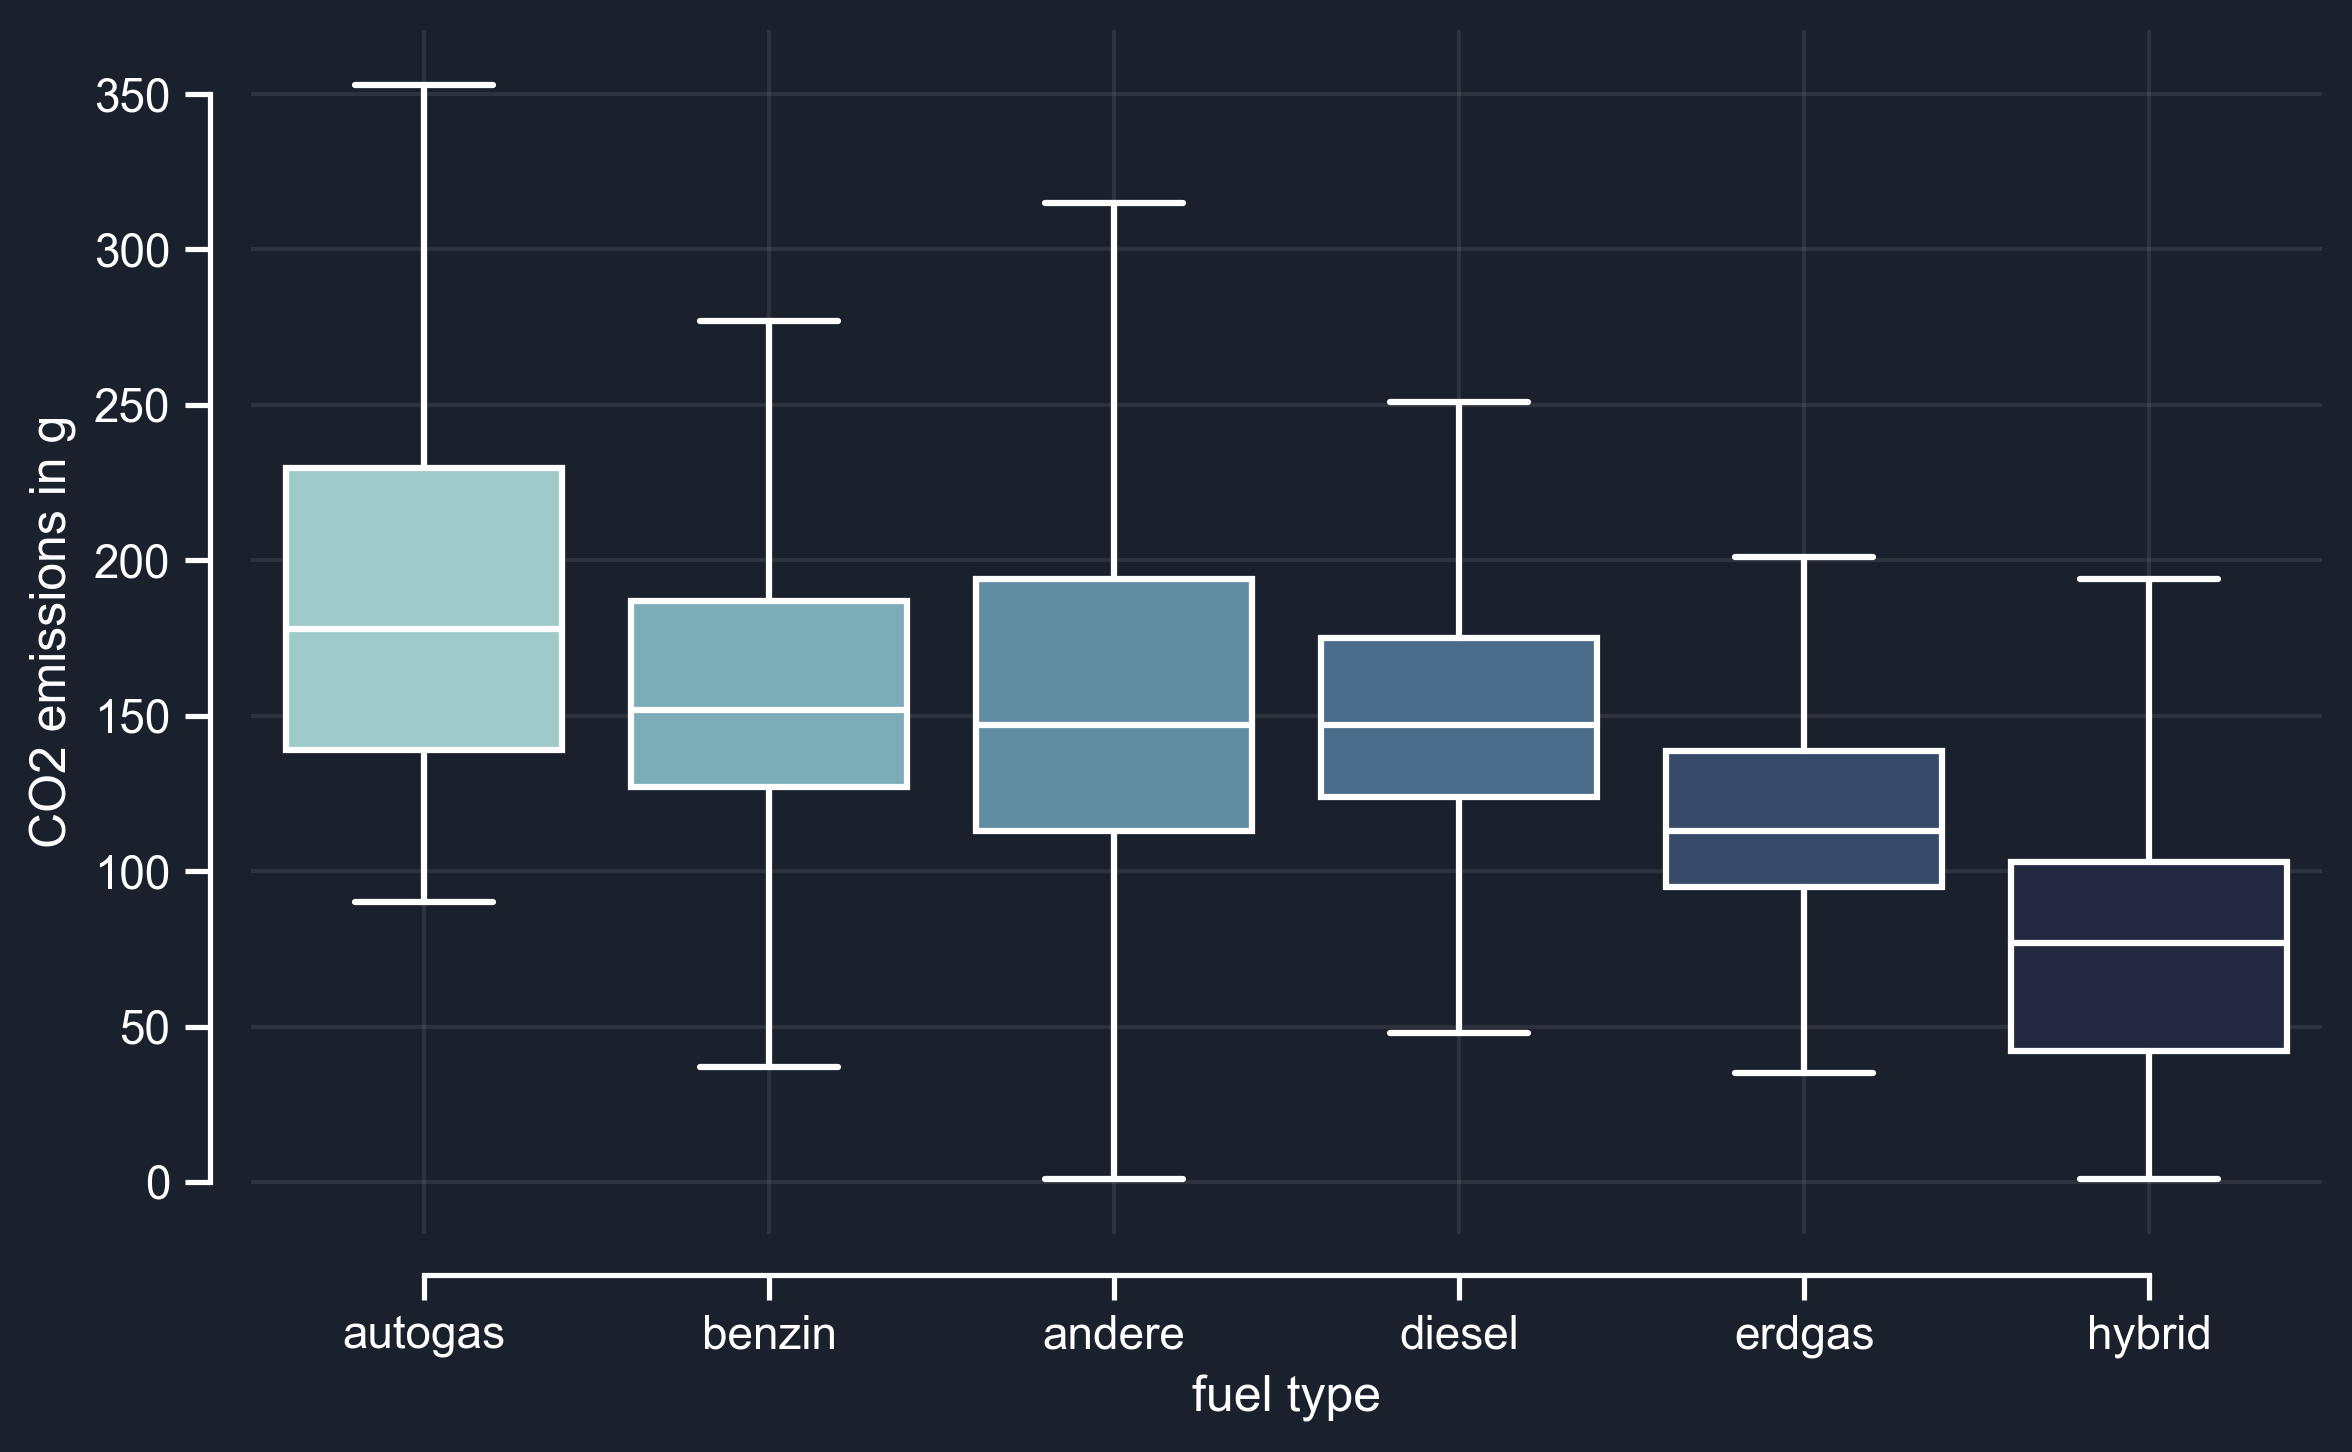

In [72]:
# make a bar chart where x is the emission class and is co2
cars = load()
cars = cars.rename(columns={"fuel":"fuel type","co2": "CO2 emissions"})

sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

order = cars.groupby('fuel type').median()
order = order.sort_values(by='CO2 emissions', ascending=False)

sns.boxplot(
    ax=ax,
    data=cars,
    x="fuel type", y="CO2 emissions",
    palette="ch:rot=-.25,hue=1,light=.75", order=order.index.tolist(),
    showfliers=False, **PROPS
)

ax.set_xlabel("fuel type")
ax.set_ylabel("CO2 emissions in g")

sns.despine(offset=10, trim=True)
set_color(fig, ax)

plt.tight_layout()
plt.savefig("../images/fuel_vs_co2", dpi=300)
plt.show()

#### Color distribution

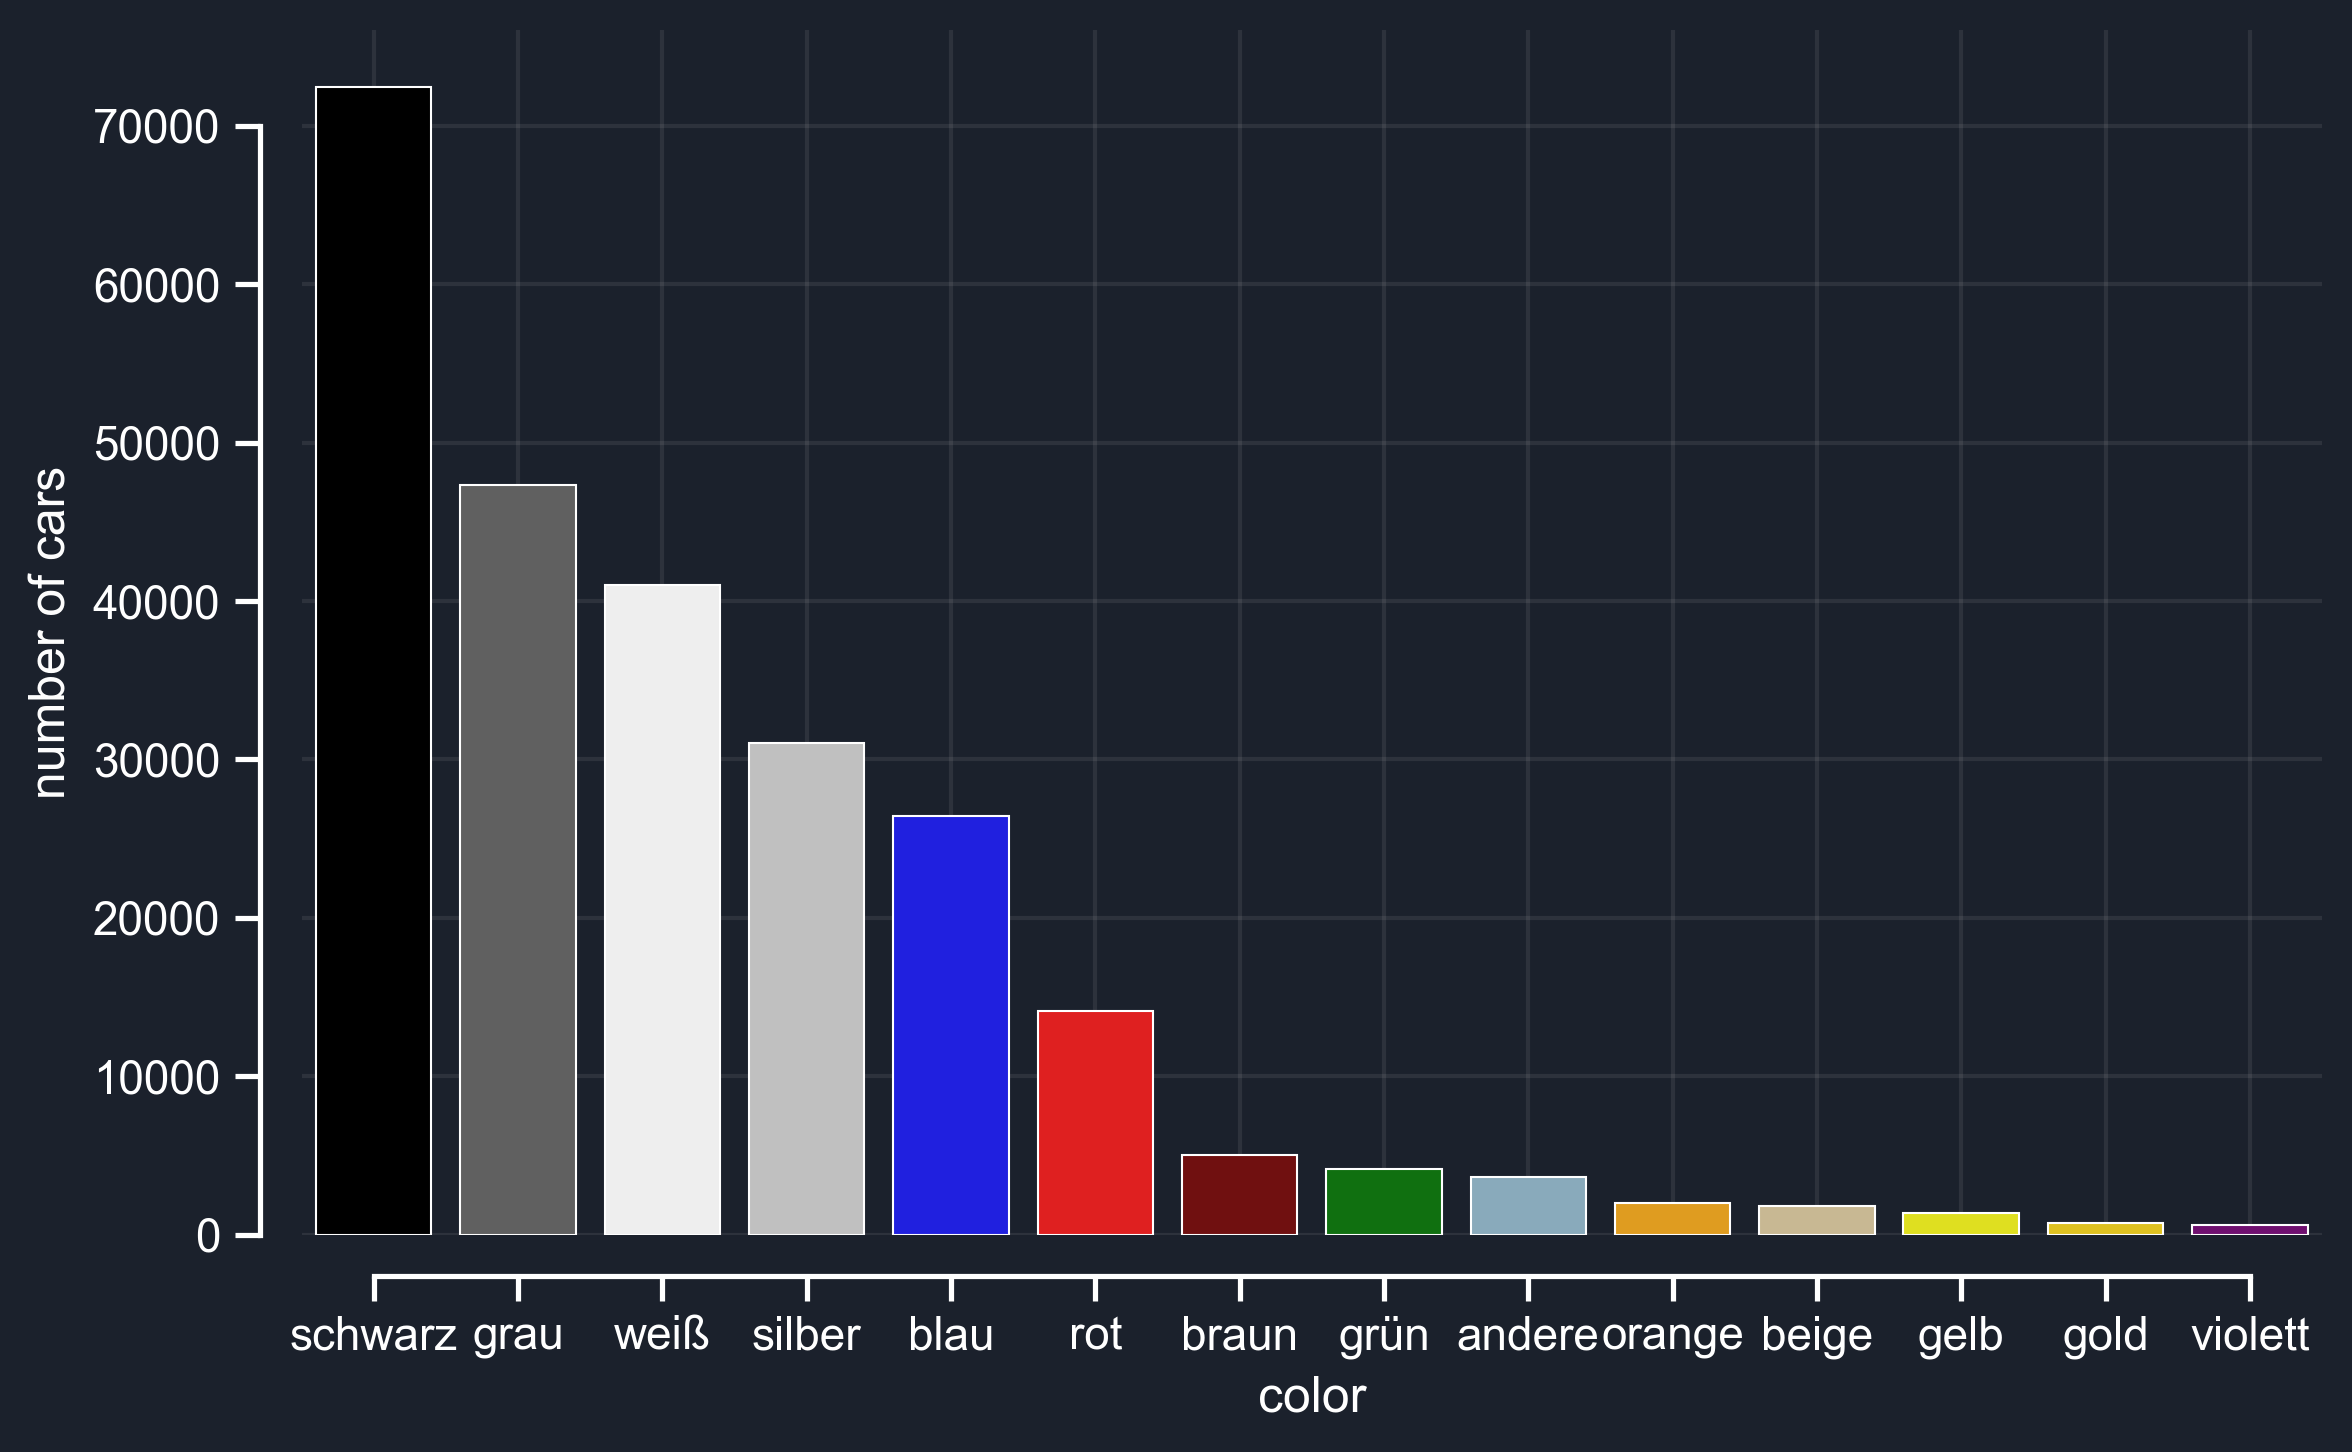

In [73]:
cars = load()

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

color_counts = cars["color"].value_counts()
color_counts = pd.DataFrame(color_counts)
color_counts = color_counts.rename(columns={"color": "count"})

sns.barplot(
    x=color_counts.index, y="count", data=color_counts,
    palette=my_pal,
    ax=ax, errcolor="white", linewidth=0.5
)

ax.set_xlabel("color")
ax.set_ylabel("number of cars")

set_color(fig, ax)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.savefig("../images/color_counts.png", dpi=300)
plt.show()
